# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


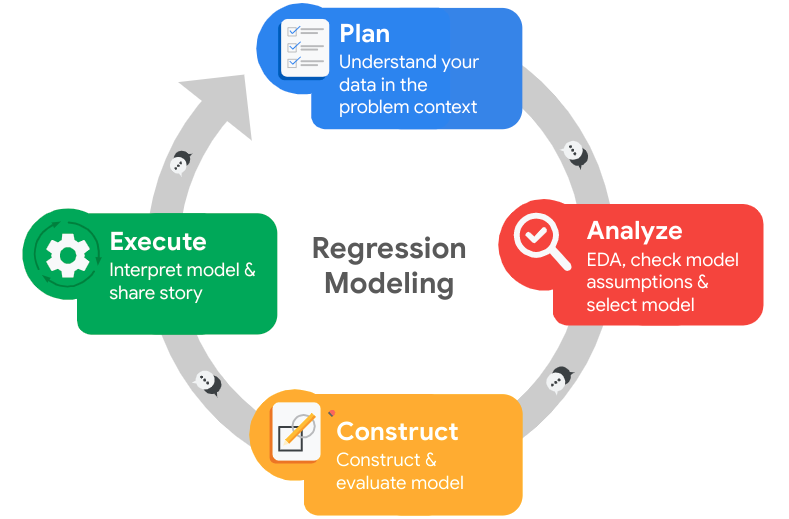

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

-  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. The stakeholders for this project is the senior leadership team of Salifort and the members of the HR department.
   
2. My goal is to create a machine learning model to determine if an employee will leave or stay in the company so that features which contribute to employee retention can be found and the HR department can use them to reduce the number of employees leaving in the company and save money that would be used to find replacements.
   
3. There are no missing values in the data but there are some duplicated rows. Only 2 predictor variables (one with 10 classes and the other with 3 classes) are categorical which means there will be at most 20 beta coefficients if a Logistic Regression Model is built.
   
4. For this stage, I find myself using the Pandas, Matplotlib, and Seaborn libraries of Python to analyze and visualize the data.
   
5. In this stage and all the others, I need to let my stakeholders know that there will be some uncertainty in the model built since both regression and machine learning models can’t predict the outcome with 100% accuracy. Furthermore, I need to consider what are the consequences when the model produces false negatives and false positives.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import sklearn.metrics as metrics
import sklearn.model_selection as md
import sklearn.linear_model as lm
import sklearn.tree as tree
import sklearn.ensemble as ensemble
import xgboost as xgb

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


1. There are no missing values in the dataset.

2. The satisfaction_level and last_evaluation variables are floats, Department and salary are stored as objects/strings, and the remaining are integers.

3. There are 14999 observations in this dataset.

### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0.columns = ['satisfaction_level', 'last_evaluation_score', 'projects_assigned', 'average_monthly_hours', 'tenure_years',
              'work_accident', 'employee_lost', 'promotion_last_5years', 'department', 'salary']

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation_score', 'projects_assigned',
       'average_monthly_hours', 'tenure_years', 'work_accident',
       'employee_lost', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation_score    0
projects_assigned        0
average_monthly_hours    0
tenure_years             0
work_accident            0
employee_lost            0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the dataset which was already confirmed before.

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

The dataset has duplicated rows which make about 20% of the dataset, those rows will be removed soon.

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation_score,projects_assigned,average_monthly_hours,tenure_years,work_accident,employee_lost,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
df1.head(5)

,satisfaction_level,last_evaluation_score,projects_assigned,average_monthly_hours,tenure_years,work_accident,employee_lost,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [11]:
df1.shape

(11991, 10)

After the duplicates were removed from the dataset, 3008 observations (20% of the original data was removed).

### Check outliers

Check for outliers in the data.

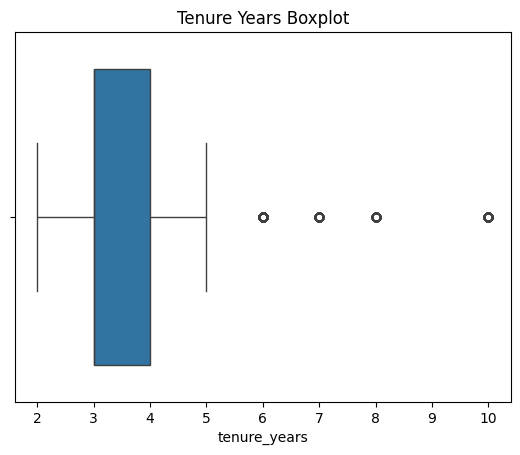

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x = df1['tenure_years'])

plt.title('Tenure Years Boxplot')

plt.show()

In [13]:
# Determine the number of rows containing outliers
iqr_tenure = (df1['tenure_years'].quantile(0.75) - df1['tenure_years'].quantile(0.25))

df1[df1['tenure_years'] > ((1.5*iqr_tenure) + df1['tenure_years'].quantile(0.75))].shape

(824, 10)

**Additional Boxplots**

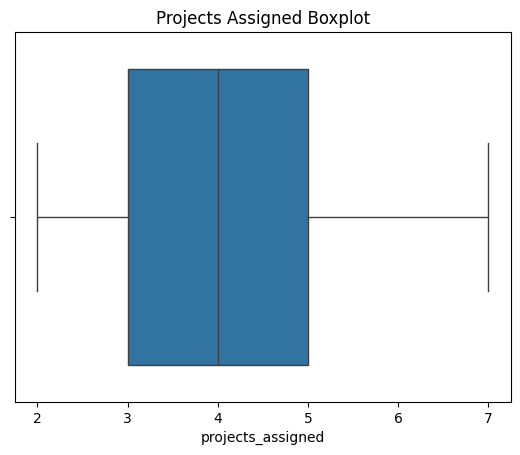

In [14]:
sns.boxplot(x = df1['projects_assigned'])

plt.title('Projects Assigned Boxplot')

plt.show()

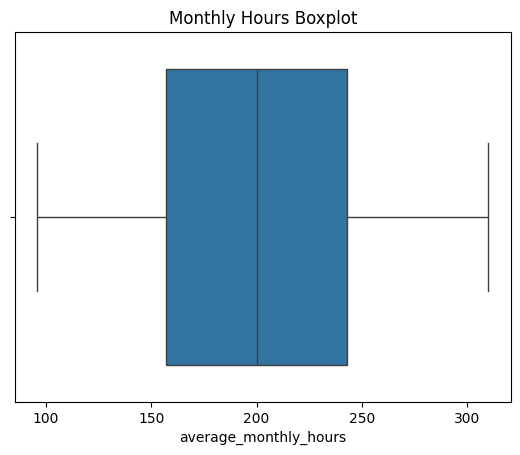

In [15]:
sns.boxplot(x = df1['average_monthly_hours'])

plt.title('Monthly Hours Boxplot')

plt.show()

Certain types of models are more sensitive to outliers than others. When the stage of building your model is reached, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage, run 1
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




1. Employees with low or medium incomes are more likely to leave. The departments of sales, technical and support are the ones with the greatest number of churn (employee exit) rates. Employees who suffered accidents in the office or who have not been promoted after 5 years in their position, are more likely to leave the company. 
If the employeescontribute simultaneously to 3 or 5, therey is a good chance that they will stay but if heye have less or more projctst assigned to them, this will increase thespossibilities of them leaving the copany.a
   
2. For the target variable, there is a class mnbalance in the data with 83 % of the rows storing information of employees who remain in the company and 17% of those who have left it.
   
3. I made 2 transformations to the data. The first one was to capitalize the classes of the 2 categorical variables. The second one was modify the dataframe by turning the 2 categorical variables into multiple dummy variables and adding them to the dataframe. This was done because for machine learning and regression models to work faster, binary predictor variables are used instead of categorical variables and this reduces computatin otime.
4. Some purposes of EDA before constructing a model are: detecting the presence of outliers in the data, discovering if there is a class imbalance for the target variable in the dataset as well as the distributions of the predictor variables, perform feature engineering, if possible, to improve the efficiency in the dataset to build a better model, and verify model assumptions to decide what type of model would be better to achieve the desired outcome and justify the decision.
   
5. I find myself using the following Python libraries: Pandas and Numpy for data manipulation and transformation, Seaborn and Matplotlib for data visualization, and Statsmodels to check the multicollinearity assumption for the numerical and binary variables.
   
6. Yes, communicate the results of the analysis and state the assumptions that the dataset violates to explain other users and stakeholders why a logistic regression model should not be built. .

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
print(df1['employee_lost'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['employee_lost'].value_counts(normalize = True))

employee_lost
0    10000
1     1991
Name: count, dtype: int64
employee_lost
0    0.833959
1    0.166041
Name: proportion, dtype: float64


In [17]:
df1[df1['employee_lost'] == 1].describe()

,satisfaction_level,last_evaluation_score,projects_assigned,average_monthly_hours,tenure_years,work_accident,employee_lost,promotion_last_5years
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.0,1991.000000
mean,0.440271,0.721783,3.883476,208.162230,3.881467,0.052737,1.0,0.004018
std,0.265207,0.197436,1.817139,61.295145,0.974041,0.223565,0.0,0.063277
min,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,1.0,0.000000
25%,0.110000,0.520000,2.000000,146.000000,3.000000,0.000000,1.0,0.000000
50%,0.410000,0.790000,4.000000,226.000000,4.000000,0.000000,1.0,0.000000
75%,0.730000,0.910000,6.000000,262.500000,5.000000,0.000000,1.0,0.000000
max,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.0,1.000000


In [18]:
df1[df1['employee_lost'] == 0].describe()

,satisfaction_level,last_evaluation_score,projects_assigned,average_monthly_hours,tenure_years,work_accident,employee_lost,promotion_last_5years
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,0.667365,0.715667,3.786800,198.942700,3.262000,0.174500,0.0,0.019500
std,0.217082,0.161919,0.981755,45.665507,1.367239,0.379558,0.0,0.138281
min,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.0,0.000000
25%,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.0,0.000000
50%,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.0,0.000000
75%,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,0.0,1.000000


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

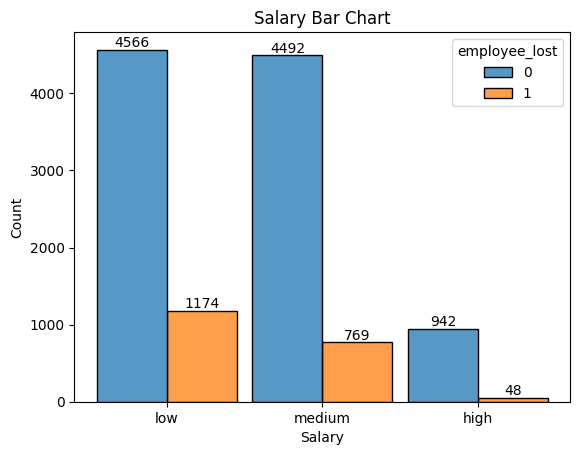

In [19]:
# Create a plot as needed
ax = sns.histplot(data = df1, x = 'salary', hue = 'employee_lost', multiple='dodge',
             shrink=0.9)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Salary')
plt.title('Salary Bar Chart')
plt.show()

Employees with low or medium incomes are more likely to leave.

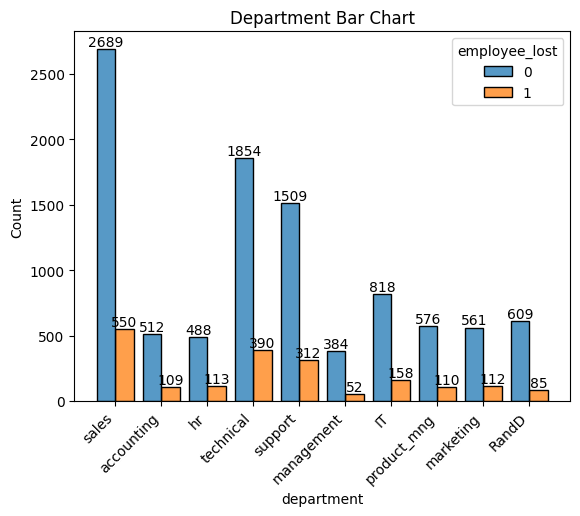

In [20]:
# Create a plot as needed
ax = sns.histplot(data = df1, x = 'department', hue = 'employee_lost', multiple='dodge',
             shrink=0.8)
plt.title('Department Bar Chart')
for container in ax.containers:
    ax.bar_label(container)

plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

The departments of sales, technical and support are the ones with the greatest number of employee exits. Furthermore, the randID and management departments are the ones with the lowest exit rates.

In [21]:
def count_bar_chart(df, col1: str, col2: str, title:str, x_label: str):
        
    df_new = pd.DataFrame({col1:[], col2:[], 'Count':[]})
    for i in np.unique(df[col1]):
        for j in np.unique(df[col2]):
            x = df_new.shape[0]
            df_new.loc[x] = [i,j,df[(df[col1] == i) & (df[col2] == j)].shape[0]]
    
    plt.figure(figsize=(12,5))
    ax = sns.barplot(data = df_new, x = col1, y = 'Count', hue = col2)
    ax.set(xlabel = x_label, title = title)
    for container in ax.containers:
        ax.bar_label(container)
    plt.savefig(title)
    plt.show()

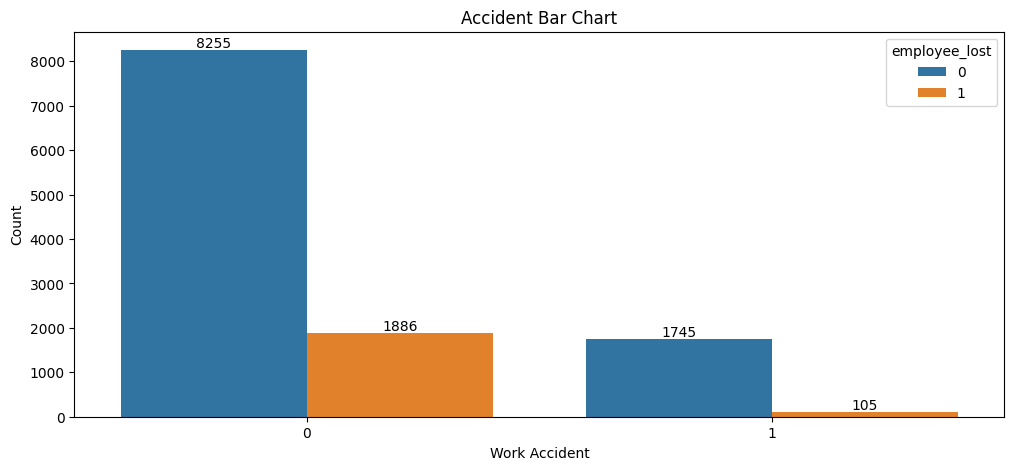

In [22]:
count_bar_chart(df1,'work_accident','employee_lost', 'Accident Bar Chart', 'Work Accident')

In [23]:
print(df1[df1['employee_lost'] == 1]['work_accident'].value_counts(normalize = True))
print(df1[df1['employee_lost'] == 0]['work_accident'].value_counts(normalize = True))

work_accident
0    0.947263
1    0.052737
Name: proportion, dtype: float64
work_accident
0    0.8255
1    0.1745
Name: proportion, dtype: float64


Employees who suffered accidents in the office are more likely to leave the company.

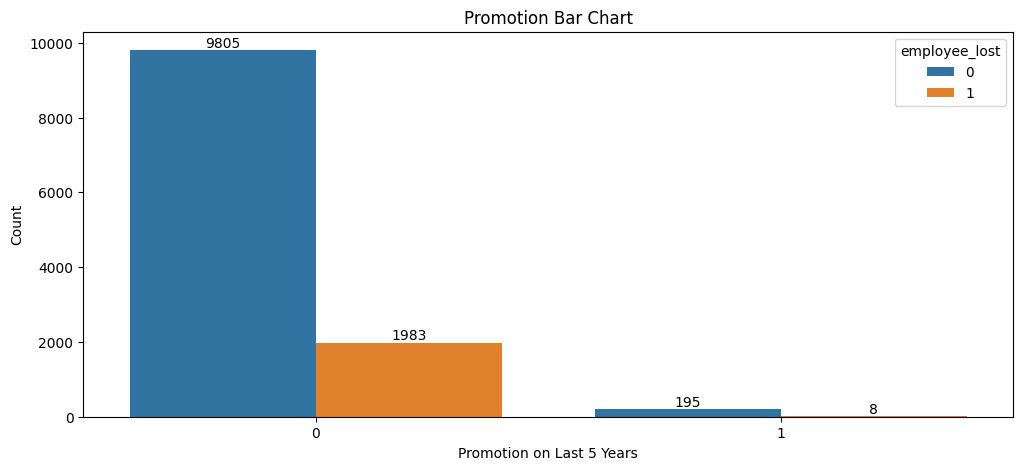

In [24]:
# Create a plot as needed
count_bar_chart(df1,'promotion_last_5years','employee_lost', 'Promotion Bar Chart', 'Promotion on Last 5 Years')

In [25]:
print('Proportion of promotions for employees who left')
print(df1[df1['employee_lost'] == 1]['promotion_last_5years'].value_counts(normalize = True))
print('Proportion of promotions for employees who stayed')
print(df1[df1['employee_lost'] == 0]['promotion_last_5years'].value_counts(normalize = True))

Proportion of promotions for employees who left
promotion_last_5years
0    0.995982
1    0.004018
Name: proportion, dtype: float64
Proportion of promotions for employees who stayed
promotion_last_5years
0    0.9805
1    0.0195
Name: proportion, dtype: float64


Most of the employees who left hadn't been promoted in the last 5 years.

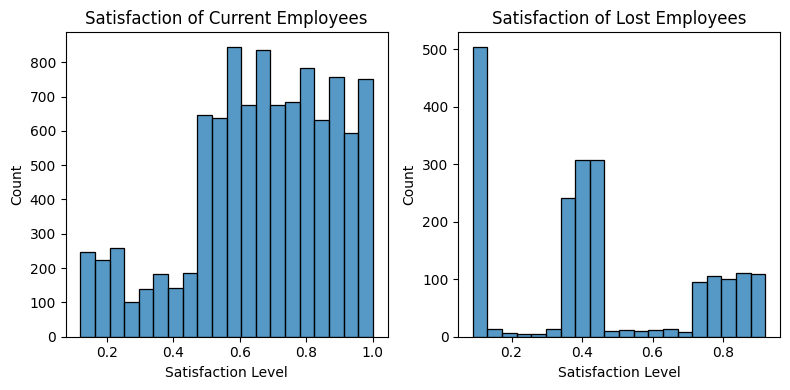

In [26]:
# Create a plot as needed
fig,axes = plt.subplots(1,2,figsize = (8,4))
sns.histplot(data = df1[df1['employee_lost'] == 0], x = 'satisfaction_level', multiple='dodge', bins = 20, ax = axes[0])
sns.histplot(data = df1[df1['employee_lost'] == 1], x = 'satisfaction_level', multiple='dodge', bins = 20, ax = axes[1])
axes[1].set(xlabel = 'Satisfaction Level', title = 'Satisfaction of Lost Employees')
axes[0].set(xlabel = 'Satisfaction Level', title = 'Satisfaction of Current Employees')
plt.tight_layout()
plt.show()

From the left histogram it is shown that employees with a high satisfaction level (higher than 0.5) are the ones most likely to stay in the company while in the right histogram, most of the employees which had a satisfaction lower than 0.5 are the ones most likely to leave.

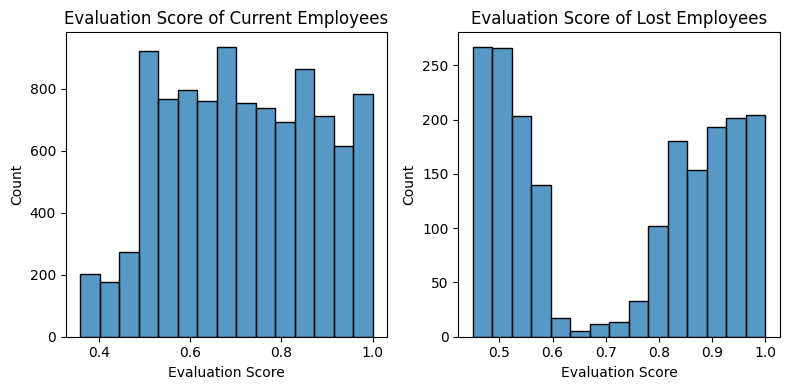

In [27]:
# Create a plot as needed
fig,axes = plt.subplots(1,2,figsize = (8,4))
sns.histplot(data = df1[df1['employee_lost'] == 0], x = 'last_evaluation_score', multiple='dodge', bins = 15, ax = axes[0])
sns.histplot(data = df1[df1['employee_lost'] == 1], x = 'last_evaluation_score', multiple='dodge', bins = 15, ax = axes[1])
axes[1].set(xlabel = 'Evaluation Score', title = 'Evaluation Score of Lost Employees')
axes[0].set(xlabel = 'Evaluation Score', title = 'Evaluation Score of Current Employees')
plt.tight_layout()
plt.show()

There is no clear relationship between the score of the employees last performance evaluation and them staying or leaving the company. This will have to be studied and analyzed further.

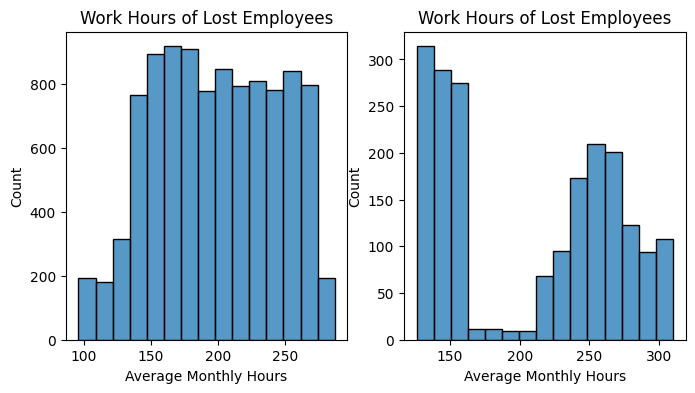

In [28]:
# Create a plot as needed
fig,axes = plt.subplots(1,2,figsize = (8,4))
sns.histplot(data = df1[df1['employee_lost'] == 0], x = 'average_monthly_hours', multiple='dodge', bins = 15, ax = axes[0])
sns.histplot(data = df1[df1['employee_lost'] == 1], x = 'average_monthly_hours', multiple='dodge', bins = 15, ax = axes[1])
axes[1].set(xlabel = 'Average Monthly Hours', title = 'Work Hours of Lost Employees')
axes[0].set(xlabel = 'Average Monthly Hours', title = 'Work Hours of Lost Employees')
plt.show()

Employees who have between 150 hours and 260 hours or works are the ones more likely to stay in their positions while those who have more or less are more likely to leave.

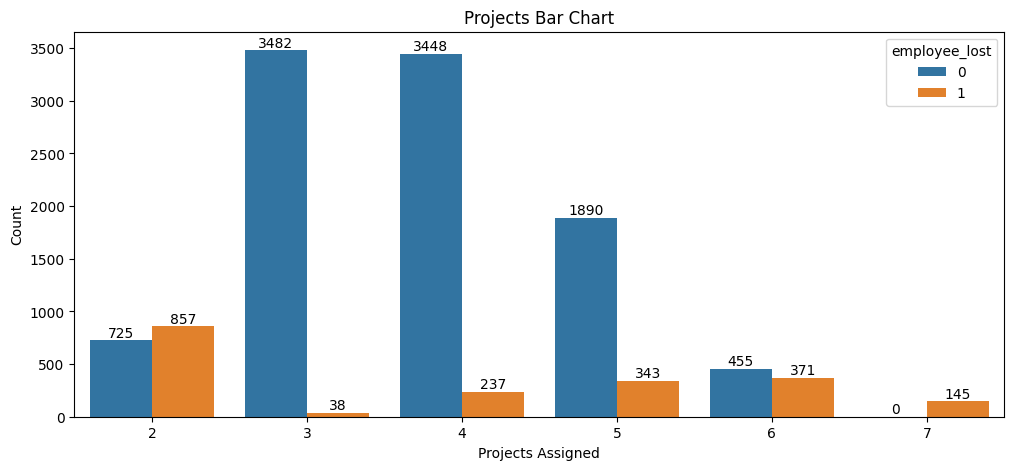

In [29]:
count_bar_chart(df1,'projects_assigned','employee_lost', 'Projects Bar Chart', 'Projects Assigned')

If the employees have between 3 and 5 projects to which they contribute, there is a good chance that they will stay but if the have less or more projects assigned to them, this will increase the possibilities of them leaving the company.

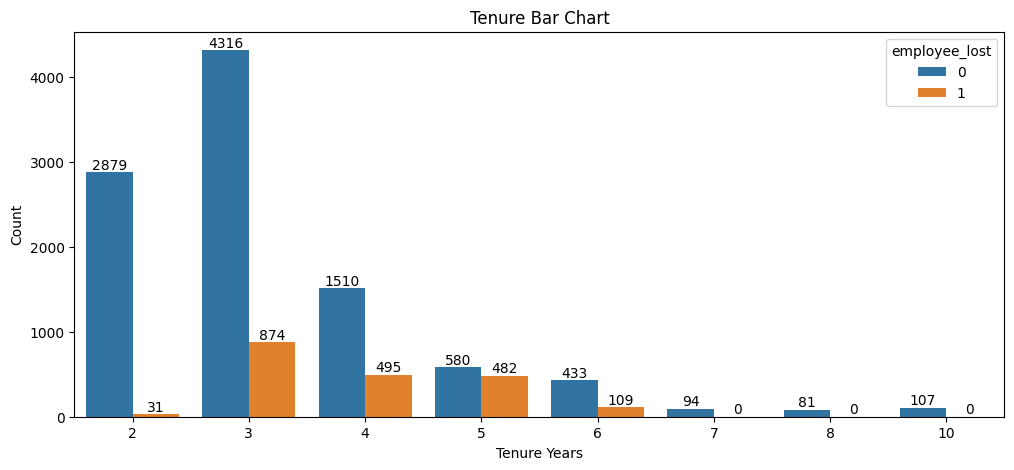

In [30]:
count_bar_chart(df1,'tenure_years','employee_lost', 'Tenure Bar Chart', 'Tenure Years')

Employees usually begin to leave the company after 3 years of service on it. Furthermore, there were little exits of employees who work for less than 3 years and no exits for those who have been more than 6 years.

**Checking the Multicollinearity Assumption**

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation_score  11991 non-null  float64
 2   projects_assigned      11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure_years           11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   employee_lost          11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


Variance Inflation Factors (VIFs) measure the correlation among independent variables in least squares regression models. Statisticians refer to this type of correlation as multicollinearity. Excessive multicollinearity can cause problems for regression models.

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
df_vif = df1.drop(['department', 'salary', 'employee_lost'], axis = 1)

vif_data = pd.DataFrame() 
vif_data["feature"] = df_vif.columns 

vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) 
                          for i in range(len(df_vif.columns))]
vif_data

,feature,VIF
0,satisfaction_level,6.712350
1,last_evaluation_score,18.751671
2,projects_assigned,13.528789
3,average_monthly_hours,17.886233
4,tenure_years,7.077480
5,work_accident,1.181744
6,promotion_last_5years,1.022509


The value of the Variance Inflator Factors (VIF) are higher than 5 for the non-binary variables which implies that there is a high collinearity between the numerical features. Therefore the multicollinearity assumption is not satisfied.

### Insights

The insights founds after doing the analysis and creating the data visualizations are:

1. There is a class imbalance in the data with 83 % of the rows storing information of employees who remain in the company and 17% of those who have left it.
   
2. Employees with low or medium incomes are more likely to leave.
   
3. The departments of sales, technical and support are the ones with the greatest number of churn (employee exit) rates.
   
4. Employees who suffered accidents in the office or who have not been promoted after 5 years in their position, are more likely to leave the company.
   
5. If the employees have between 3 and 5 projects to which they contribute, there is a good chance that they will stay but if the have less or more projects assigned to them, this will increase the posibilities of them leaving the company.
    
6. Employees with a high satisfaction level (higher than 0.5) are the ones most likely to stay in the company while most of the employees which had a satisfaction lower than 0.5 are the ones most likely to leave.
    
7. There is no clear relationship between the score of the employees last evaluation and them staying or leaving the company. This will have to be studied and analyzed further.
    
8. The multicollinearity assumption of a logistic regression model is not satisfied for most numerical variables.

In [34]:
df1['salary'] = df1['salary'].str.title()

df1['department'] = df1['department'].str.title()

df1.loc[df1['department'] == 'It', 'department'] = "IT"

df1.loc[df1['department'] == 'Hr', 'department'] = "HR"

C:\Users\Owner\AppData\Local\Temp\ipykernel_33896\1391772488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['salary'] = df1['salary'].str.title()
C:\Users\Owner\AppData\Local\Temp\ipykernel_33896\1391772488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['department'] = df1['department'].str.title()


In [35]:
df_dummy = pd.get_dummies(df1)

df_dummy

,satisfaction_level,last_evaluation_score,projects_assigned,average_monthly_hours,tenure_years,work_accident,employee_lost,promotion_last_5years,department_Accounting,department_HR,...,department_Management,department_Marketing,department_Product_Mng,department_Randd,department_Sales,department_Support,department_Technical,salary_High,salary_Low,salary_Medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,False,False,...,True,False,False,False,False,False,False,True,False,False
11996,0.74,0.95,5,266,10,0,0,1,False,False,...,True,False,False,False,False,False,False,True,False,False
11997,0.85,0.54,3,185,10,0,0,1,False,False,...,True,False,False,False,False,False,False,True,False,False
11998,0.33,0.65,3,172,10,0,0,1,False,False,...,False,True,False,False,False,False,False,True,False,False


In [36]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11991 non-null  float64
 1   last_evaluation_score   11991 non-null  float64
 2   projects_assigned       11991 non-null  int64  
 3   average_monthly_hours   11991 non-null  int64  
 4   tenure_years            11991 non-null  int64  
 5   work_accident           11991 non-null  int64  
 6   employee_lost           11991 non-null  int64  
 7   promotion_last_5years   11991 non-null  int64  
 8   department_Accounting   11991 non-null  bool   
 9   department_HR           11991 non-null  bool   
 10  department_IT           11991 non-null  bool   
 11  department_Management   11991 non-null  bool   
 12  department_Marketing    11991 non-null  bool   
 13  department_Product_Mng  11991 non-null  bool   
 14  department_Randd        11991 non-null  boo

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. It is odd that the number of false negatives is equal for the confusion matrix of each model during the validation phase and the testing set. Furthermore, whether or not employees have been promoted over the most recent 5 years had less importance for the Random Forest Model than anticipated.

2. I chose to include all the numerical variables to have more features to reduce the bias and add more information for the model to make better decisions.

3. For the Logistic Regression model, 2 assumptions are not met which is why it wasn't built. Regarding the other models, the assumptions are met.

4. The winning model which is the Random Forest model fits the data well. The metric use to select the most efficient model is the F1 score (the harmonic mean of the precision and recall score), the F1 score of the model when testing the model with the test data is higher than 0.9 as well as its recall and precision scores. This implies the model fits the data very well despite the presence of some false positives and false negatives.

5. The model could be improved if additional features could be added to the dataset like number of vacations given, whether the employee received a bonus, if the department has development resources for the employees, etc.

6. The main resources that I used for this stage are the sklearn and xgboost libraries to build the 3 models that were used to decide the most appropriate model for the task. Furthermore, the library sklearn was used to perform hyperparameter tuning to obtain the parameters which would produce the best performing models and compute the precision, recall, area under the curve, and F1 score of each model as well as the confusion matrices used to evaluate the models. The last resource used was the help function of Python to search for the multiple hyperparameters of the functions used to create the models.

7. Some ethical obligations during this stage are: make sure that the class imbalance shown in the dataset for the target variable is also transmitted to the training, validation and testing sets to avoid inserting bias into the model for representing more employees who stayed in the company and generate inaccurate insights and conclusions. Furthermore, select the model based on the parameters which produce the highest evaluation metrics and generate the least number of errors. Finally, stating the meaning of errors like what false positives and false negatives represent in a confusion matrix to give context to non-technical users is important.

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal of the model is to predict whether or not an employee will leave the company. To achieve this a classification model will need to be built.

### Identify the types of models most appropriate for this task.

There are many classification models that could be built to achieve the goal. Some of those are:

1. Logistic regression model.
2. Bayes machine learning model.
3. Decision Tree.
4. Random Forests.
5. XGBoosting.

From the list above, the Logistic model can't be used since 2 of its assumptions (no extreme outliers in the data and no multicollinearity between the predictor variables) are violated.

The Bayes model may not be a good model to use since there are many types of Bayes models, all determined by the type of predictor variables that are present. The dataset has 2 categorical variables, 2 binary variables and 5 numerical variables. Therefore, there are not enough variables of the same type to build a Bayes prediction model.

Decision Trees, Random Forests and XGBoosting are models which don't require too much data preprocessing, can handle outliers well and any type of data (discrete, continuous and categorical). Therefore, those 3 types of model could be used to build the target model.

### Hypothesis Testing

The visuals revealed that most of the numerical discrete and continuous predictor variables have a relationship with the target variable. One of those variables didn't show a clear relationship. To fully confirm this, hypothesis tests will be conducted on the means of the variables to compare the values of employees who left and stayed in the company.

The significance level will be 0.05 for each of the following tests. Furthermore, the null hypothesis will be rejected if the p-value is lower than the significance level.

**Satisfaction Level**

Null Hypothesis: the mean satisfaction level of employees who left the company is equal to the one of those who remained in the job.

Alternative Hypothesis: the mean satisfaction level of employees who left the company is different than the one of those who remained in the job.

In [37]:
sp.stats.ttest_ind(df1[df1['employee_lost'] == 0]['satisfaction_level'],
                      df1[df1['employee_lost'] == 1]['satisfaction_level'],
                      equal_var = False,
                      alternative ='two-sided')

TtestResult(statistic=35.88930498486623, pvalue=1.193953844039104e-228, df=2547.316689484498)

The p-value is extremely close to 0 and is lower than the significance level. Therefore, the null hypothesis is rejected and it is concluded that the mean level of satisfaction is different for employees who stayed in the company and those who left it.

By taking a look at the 2 dataframes at the beginning of the Analysis section of this notebook which have descriptive statistics for both groups of employees, the mean is higher for the employees who stayed which is supported by the sign of the statistic in the test.

**Last Evaluation Score**

Null Hypothesis: the mean evaluation score of employees who left the company is equal to the one of those who remained in the job.

Alternative Hypothesis: the mean evaluation score of employees who left the company is different than the one of those who remained in the job.

In [38]:
sp.stats.ttest_ind(df1[df1['employee_lost'] == 0]['last_evaluation_score'],
                      df1[df1['employee_lost'] == 1]['last_evaluation_score'],
                      equal_var = False,
                      alternative ='two-sided')

TtestResult(statistic=-1.298040887576492, pvalue=0.1943906982070123, df=2549.55027139441)

The p-value is close to 0.19 which is higher than the significance level. Therefore, the null hypothesis is not rejected. However, this doesn't mean that it is concluded that the means of both scores are equal.

By taking a look at the 2 dataframes at the beginning of the Analysis section of this notebook which have descriptive statistics for both groups of employees, the mean is slightly higher for the employees who left.

**Projects Assigned**

Null Hypothesis: the mean number of projects assigned to employees who left the company is equal to the one of those who remained in the job.

Alternative Hypothesis: the mean number of projects assigned to employees who left the company is different than the one of those who remained in the job.

In [39]:
sp.stats.ttest_ind(df1[df1['employee_lost'] == 0]['projects_assigned'],
                      df1[df1['employee_lost'] == 1]['projects_assigned'],
                      equal_var = False,
                      alternative ='two-sided')

TtestResult(statistic=-2.307798135702878, pvalue=0.021101641546731904, df=2226.5291526046753)

The p-value is close to 0.02 which is lower than the significance level. Therefore, the null hypothesis is rejected and it is concluded that the mean number of projects assigned is different for employees who stayed in the company and those who left it.

By taking a look at the 2 dataframes at the beginning of the Analysis section of this notebook which have descriptive statistics for both groups of employees, the mean is higher for the employees who left which is supported by the sign of the statistic in the test. However, it is important to remember the insights provided by the bar chart of this variable as well which is that employees with less than 2 projects assigned to them are also likely to leave the company.

**Monthly Work Hours**

Null Hypothesis: the mean number of work hours per month of employees who left the company is equal to the one of those who remained in the job.

Alternative Hypothesis: the mean number of work hours per month of employees who left the company is different than the one of those who remained in the job.

In [40]:
sp.stats.ttest_ind(df1[df1['employee_lost'] == 0]['average_monthly_hours'],
                      df1[df1['employee_lost'] == 1]['average_monthly_hours'],
                      equal_var = False,
                      alternative ='two-sided')

TtestResult(statistic=-6.368796832309122, pvalue=2.2679467569333254e-10, df=2448.175778067714)

The p-value is close to 0 which is lower than the significance level. Therefore, the null hypothesis is rejected and it is concluded that the mean number of work hours per month is different for employees who stayed in the company and those who left it.

By taking a look at the 2 dataframes at the beginning of the Analysis section of this notebook which have descriptive statistics for both groups of employees, the mean is higher for the employees who left which is supported by the sign of the statistic in the test.

**Tenure Years**

Null Hypothesis: the mean number of tenure years of employees who left the company is equal to the one of those who remained in the job.

Alternative Hypothesis: the mean number of tenure years of employees who left the company is different than the one of those who remained in the job.

In [41]:
sp.stats.ttest_ind(df1[df1['employee_lost'] == 0]['tenure_years'],
                      df1[df1['employee_lost'] == 1]['tenure_years'],
                      equal_var = False,
                      alternative ='two-sided')

TtestResult(statistic=-24.04980075660298, pvalue=5.787449664537033e-119, df=3742.913647541716)

The p-value is extremely close to 0 which is lower than the significance level. Therefore, the null hypothesis is rejected and it is concluded that the mean number of tenure years is different for employees who stayed in the company and those who left it.

By taking a look at the 2 dataframes at the beginning of the Analysis section of this notebook which have descriptive statistics for both groups of employees, the mean is higher for the employees who left which is supported by the sign of the statistic in the test.

### Hypothesis Tests Conclusions

Most of the numerical variables used in the tests show that there is a difference in the mean values for each group of employees. Regarding the variable which represents the evaluation scores, despite the fact that there is no significant difference at the selected level, it will be used to build the model to avoid eliminating information that could be valuable to the model.

In [42]:
df_dummy = pd.get_dummies(df1)

df_dummy

,satisfaction_level,last_evaluation_score,projects_assigned,average_monthly_hours,tenure_years,work_accident,employee_lost,promotion_last_5years,department_Accounting,department_HR,...,department_Management,department_Marketing,department_Product_Mng,department_Randd,department_Sales,department_Support,department_Technical,salary_High,salary_Low,salary_Medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,False,False,...,True,False,False,False,False,False,False,True,False,False
11996,0.74,0.95,5,266,10,0,0,1,False,False,...,True,False,False,False,False,False,False,True,False,False
11997,0.85,0.54,3,185,10,0,0,1,False,False,...,True,False,False,False,False,False,False,True,False,False
11998,0.33,0.65,3,172,10,0,0,1,False,False,...,False,True,False,False,False,False,False,True,False,False


### Modeling

Add as many cells as you need to conduct the modeling process.

**Dataset Splitting**

In [43]:
X = df_dummy.drop(['employee_lost'], axis = 1)

y = df_dummy['employee_lost']

In [44]:
X_train, X_test, y_train, y_test = md.train_test_split(X,y, test_size = 0.2, random_state = 0, stratify=y)

y_train.value_counts(normalize = True)

employee_lost
0    0.833924
1    0.166076
Name: proportion, dtype: float64

In [45]:
X_tr, X_val, y_tr, y_val = md.train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

**Model Creation & Selection**

In [46]:
simple_tree = tree.DecisionTreeClassifier(random_state = 0)

scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

cv_params_tree = {'max_depth': [5,10,15,20],
                  'min_samples_split': [4,6,8,10],
                  'min_samples_leaf': [2,3,4,5]}

#max_depth represents the number of decisions/splits that the tree can have.

#min_samples_split indicates the minimum amount of observations that a leaf needs to have before splitting it based on a decision.

#min_samples_leaf indicates the minimum amount of observations that a leaf created after a decision needs to have.

simple_tree_CV = md.GridSearchCV(simple_tree, cv_params_tree, scoring = scoring, cv = 5, refit = 'f1')

In [47]:
%%time

simple_tree_CV.fit(X_tr, y_tr)

CPU times: total: 11.7 s
Wall time: 16.4 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [4, 6, 8, 10]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [48]:
print(f'The best parameters to build the tree are {simple_tree_CV.best_params_}')

print(f'The best score for the f1 metric with the best parameters is {simple_tree_CV.best_score_}')

The best parameters to build the tree are {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
The best score for the f1 metric with the best parameters is 0.94099157259197


In [49]:
random_forest = ensemble.RandomForestClassifier(random_state = 0)

cv_params_rf = {'max_depth': [5,10,15],
                  'min_samples_split': [4,6,8],
                  'min_samples_leaf': [2,3,4],
                  'n_estimators': [50,75],
                  'max_features': [0.5, 0.75]}

#n_estimators indicates the number of tree created to make the decision.

#max_features indicates the percentage of features used to create each tree.

random_forest_CV = md.GridSearchCV(random_forest, cv_params_rf, scoring = scoring, cv = 5, refit = 'f1')

In [50]:
%%time

random_forest_CV.fit(X_tr, y_tr)

CPU times: total: 4min 26s
Wall time: 26min 23s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [0.5, 0.75],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [50, 75]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [51]:
print(f'The best parameters to build the tree are {random_forest_CV.best_params_}')

print(f'The best score for the f1 metric with the best parameters is {random_forest_CV.best_score_}')

The best parameters to build the tree are {'max_depth': 10, 'max_features': 0.75, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 75}
The best score for the f1 metric with the best parameters is 0.9493229987742783


In [52]:
xgb_model = xgb.XGBClassifier(objective = 'binary:logistic', random_state = 0)

cv_params_xgb = {'max_depth': [5,10,15],
                  'min_child_weight': [2,3,4],
                  'n_estimators': [50,75],
                  'learning_rate': [0.05, 0.1],
                 'colsample_bytree': [0.5,0.75,0.9]}

#learning_rate indicates the weight that the errors of the previous tree have on the

#colsample_bytree indicates the percentage of features used to create each tree.

xgb_model_CV = md.GridSearchCV(xgb_model, cv_params_xgb, scoring = scoring, cv = 5, refit = 'f1')

In [53]:
%%time

xgb_model_CV.fit(X_tr, y_tr)

CPU times: total: 7min 45s
Wall time: 4min 29s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.5, 0.75, 0.9],
                         'learning_rate': [0.05, 0.1], 'max_depth': [5, 10, 15],
                         'min_child_weight': [2, 3, 4],
                         'n_estimators': [50, 75]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [54]:
print(f'The best parameters to build the tree are {xgb_model_CV.best_params_}')

print(f'The best score for the f1 metrics with the best parameters is {xgb_model_CV.best_score_}')

The best parameters to build the tree are {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 50}
The best score for the f1 metrics with the best parameters is 0.9475631922359762


In [55]:
def best_metrics_frame(model_name : str, model_used):
    metrics_frame = pd.DataFrame(model_used.cv_results_)
    best_metrics = metrics_frame.iloc[metrics_frame['mean_test_f1'].idxmax(),]
    best_metrics_frame = pd.DataFrame({'Model Name':model_name,
                                      'F1 Score': [best_metrics['mean_test_f1'],],
                                      'Accuracy': [best_metrics['mean_test_accuracy'],],
                                      'Recall': [best_metrics['mean_test_recall'],],
                                      'Precision': [best_metrics['mean_test_precision'],],
                                      'AUC': [best_metrics['mean_test_roc_auc'],]})
    
    return best_metrics_frame  

In [56]:
training_metrics_df = pd.concat([best_metrics_frame('Decision Tree', simple_tree_CV),
                                 best_metrics_frame('Random Forest', random_forest_CV),
                                 best_metrics_frame('XGB', xgb_model_CV)]).reset_index(drop = True)

training_metrics_df

,Model Name,F1 Score,Accuracy,Recall,Precision,AUC
0,Decision Tree,0.940992,0.981235,0.914342,0.969554,0.948928
1,Random Forest,0.949323,0.984015,0.916033,0.985321,0.973016
2,XGB,0.947563,0.983459,0.913487,0.984463,0.982038


Each model performs significantly well for the main metrics (F1) and the other metrics are all higher than 0.9.

In [57]:
y_pval_tree = simple_tree_CV.predict(X_val)

y_pval_rf = random_forest_CV.predict(X_val)

y_pval_xgb = xgb_model_CV.predict(X_val)

In [58]:
def confusion_matrix_displayer(test, pred, title: str, model_used):
    table1 = metrics.confusion_matrix(test, pred, labels = model_used.classes_)
    visual = metrics.ConfusionMatrixDisplay(confusion_matrix = table1, display_labels = model_used.classes_)
    visual.plot()
    plt.title(title)
    plt.show()

Areas of the confusion matrix for the models:

Upper left quadrant (True Negatives): the model correctly predicts than an employee will remain in the company.

Upper right quadrant (False Positives): the model predicts than an employee will leave when he/she will actually remain in the company.

Lower left quadrant (False Negatives): the model predicts than an employee will stay when he/she will actually leave the company.

Lower right quadrant (True Positives): the model correctly predicts than an employee will leave the company.

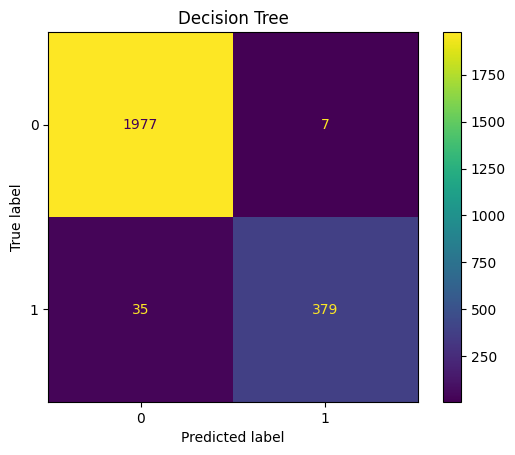

In [59]:
confusion_matrix_displayer(y_val, y_pval_tree, 'Decision Tree', simple_tree_CV)

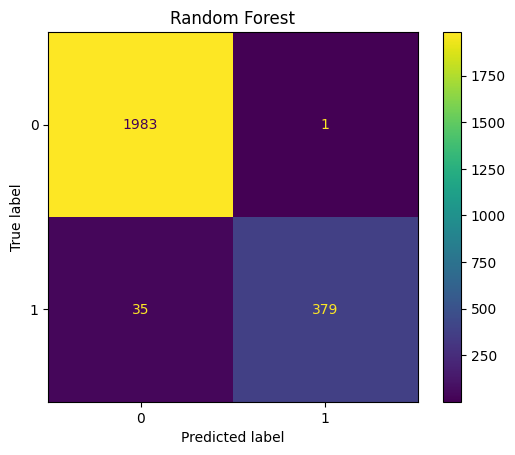

In [60]:
confusion_matrix_displayer(y_val, y_pval_rf, 'Random Forest', random_forest_CV)

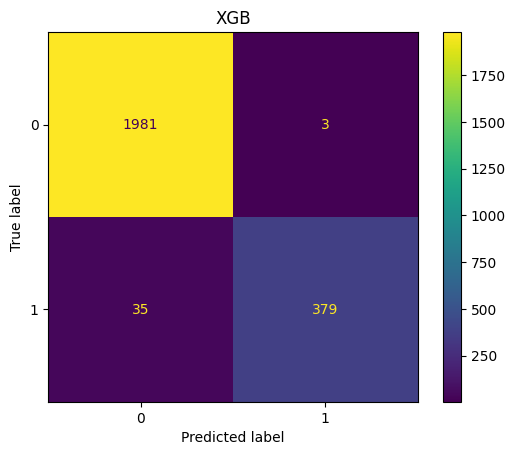

In [61]:
confusion_matrix_displayer(y_val, y_pval_xgb, 'XGB', xgb_model_CV)

In [62]:
print(f'F1 score of the Decision Tree Model: {round(metrics.f1_score(y_val, y_pval_tree),5)}')
print(f'F1 score of the Random Forest Model: {round(metrics.f1_score(y_val, y_pval_rf),5)}')
print(f'F1 score of the XGB Model: {round(metrics.f1_score(y_val, y_pval_xgb),5)}')

F1 score of the Decision Tree Model: 0.9475
F1 score of the Random Forest Model: 0.95466
F1 score of the XGB Model: 0.95226


In [63]:
print(f'Precision score of the Decision Tree Model: {round(metrics.precision_score(y_val, y_pval_tree),5)}')
print(f'Precision score of the Random Forest Model: {round(metrics.precision_score(y_val, y_pval_rf),5)}')
print(f'Precision score of the XGB Model: {round(metrics.precision_score(y_val, y_pval_xgb),5)}')

Precision score of the Decision Tree Model: 0.98187
Precision score of the Random Forest Model: 0.99737
Precision score of the XGB Model: 0.99215


In [64]:
print(f'Recall score of the Decision Tree Model: {round(metrics.recall_score(y_val, y_pval_tree),5)}')
print(f'Recall score of the Random Forest Model: {round(metrics.recall_score(y_val, y_pval_rf),5)}')
print(f'Recall score of the XGB Model: {round(metrics.recall_score(y_val, y_pval_xgb),5)}')

Recall score of the Decision Tree Model: 0.91546
Recall score of the Random Forest Model: 0.91546
Recall score of the XGB Model: 0.91546


The confusion matrix of the Random Forest is the matrix which shows the lowest amount of false positives. Regarding the number of false negatives, each matrix has 35 which means that all are equally good to predict false negatives.

The number of errors is smaller for the Random Forest model, and the value of each metric (except for recall which is equal in each model) is higher for this model. Therefore, the best model to predict whether an employee will leave or stay in the company is the random forest.

In [65]:
%%time

rf_final_CV = md.GridSearchCV(random_forest, cv_params_rf, scoring = scoring, cv = 5, refit = 'f1')

rf_final_CV.fit(X_train,y_train)

CPU times: total: 4min 50s
Wall time: 10min 38s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [0.5, 0.75],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [50, 75]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [66]:
best_metrics_frame('Random Forest Modified', rf_final_CV)

,Model Name,F1 Score,Accuracy,Recall,Precision,AUC
0,Random Forest Modified,0.951547,0.984466,0.918397,0.987225,0.979844


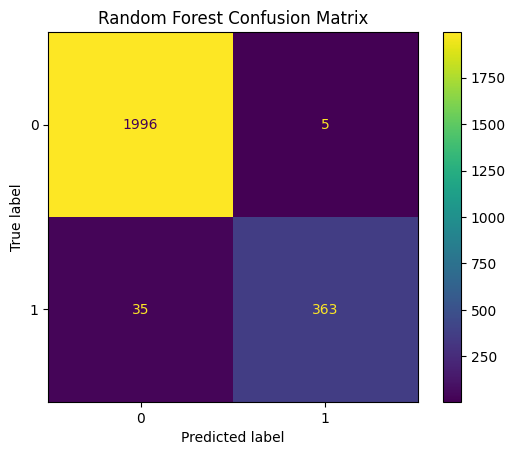

In [67]:
y_pred = rf_final_CV.predict(X_test)

confusion_matrix_displayer(y_test, y_pred, 'Random Forest Confusion Matrix', rf_final_CV)

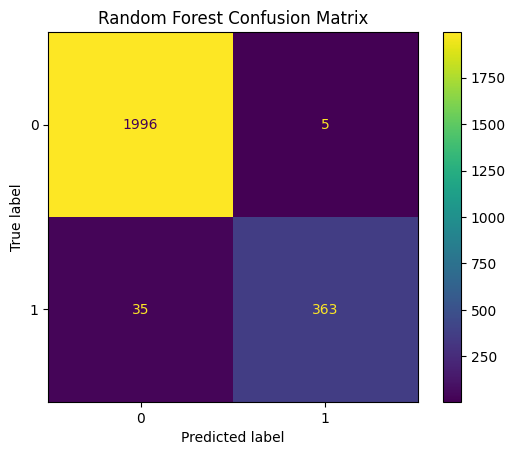

In [68]:
table1 = metrics.confusion_matrix(y_test, y_pred, labels = rf_final_CV.classes_)
visual = metrics.ConfusionMatrixDisplay(confusion_matrix = table1, display_labels = rf_final_CV.classes_)
visual.plot()
plt.title('Random Forest Confusion Matrix')
plt.savefig('Confusion_Matrix.png');
plt.show()

In [69]:
print(f'F1 score of the Random Forest Model with the test data is: {round(metrics.f1_score(y_test, y_pred),5)}')
print(f'Recall score of the Random Forest Model with the test data is: {round(metrics.recall_score(y_test, y_pred),5)}')
print(f'Precision score of the Random Forest Model with the test data is: {round(metrics.precision_score(y_test, y_pred),5)}')

F1 score of the Random Forest Model with the test data is: 0.94778
Recall score of the Random Forest Model with the test data is: 0.91206
Precision score of the Random Forest Model with the test data is: 0.98641


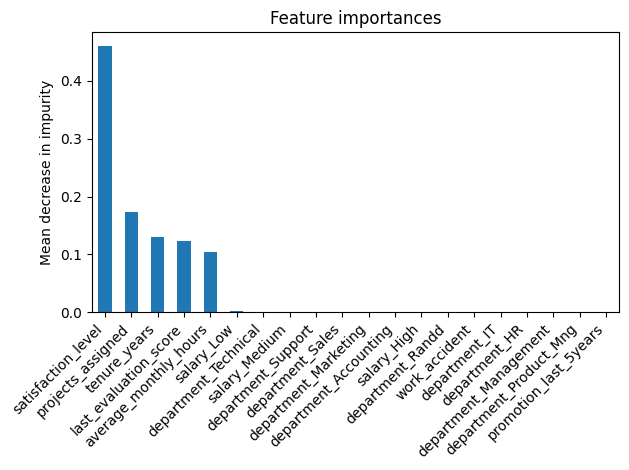

In [70]:
importances = rf_final_CV.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns).sort_values(ascending = False)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
plt.xticks(rotation = 45, horizontalalignment = 'right')

fig.tight_layout()
plt.savefig('Feature_Importance.png')

Gini impurity is a metric that measures the probability from a randomly chosen element to be incorrectly classified, i.e. the probability of choosing an element times the probability of being misclassified.

Gini importance measures the average gain of purity by splits of a given variable. If the variable is useful, it tends to split mixed labeled nodes into pure single class nodes.

# pAce: Analyze Stage, run 2

For this second execution of the Analyze stage, the relationships between the predictor variables and the target variables will be studied further and more carefully to see if a model whose results are more efficient than the one created in the Construct stage could be produced.

In [71]:
df1.columns

Index(['satisfaction_level', 'last_evaluation_score', 'projects_assigned',
       'average_monthly_hours', 'tenure_years', 'work_accident',
       'employee_lost', 'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [72]:
def dataframe_outlier_producer(col1: str, col2: str, col3: str):
    df_projects = pd.DataFrame(columns = [col1, col2, 'total_outliers', 'total observations'])
    for i in np.unique(df1[col1]):
        for j in np.unique(df1[col2]):
            d1 = df1[(df1[col1] == i) & (df1[col2] == j)][col3]
            num = d1.shape[0]
            iqr = d1.quantile(0.75) - d1.quantile(0.25)
            d_high = d1[((1.5 * iqr) + d1.quantile(0.75) < d1)]
            d_low = d1[((d1.quantile(0.25) - (1.5 * iqr) > d1))]
            outliers = d_high.shape[0] + d_low.shape[0]
            row = df_projects.shape[0]
            df_projects.loc[row] = [i, j, outliers, num]
            
    return df_projects

In [73]:
def bar_boxplot_producer(data1, data2, col1: str, col2: str, col3: str, title1: str, title2: str):

    fig,axes = plt.subplots(1,2,figsize = (12,5))

    sns.boxplot(data = data1, y = col1, x = col2, hue = col3, ax = axes[0])
    axes[0].set(xlabel = col2, ylabel = col1, title = title1)

    sns.barplot(data = data2, y = 'total observations', x = col2, hue = col3, ax = axes[1])
    axes[1].set(xlabel = col2, ylabel = 'Total Observations', title = title2)

    for container in axes[1].containers:
        axes[1].bar_label(container)

    plt.tight_layout()
    plt.savefig('Bar and Boxplot for' + col2)
    plt.show()

In [74]:
df_salary = dataframe_outlier_producer('salary', 'employee_lost', 'satisfaction_level')

df_salary.sort_values(by = 'employee_lost')

,salary,employee_lost,total_outliers,total observations
0,High,0,0,942
2,Low,0,0,4566
4,Medium,0,0,4492
1,High,1,16,48
3,Low,1,0,1174
5,Medium,1,0,769


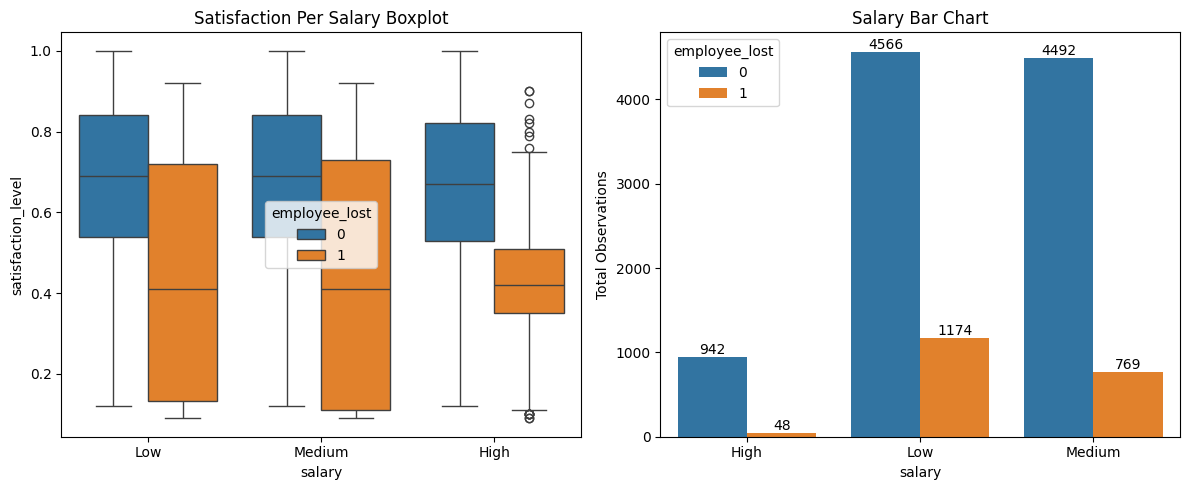

In [75]:
bar_boxplot_producer(df1, df_salary, 'satisfaction_level', 'salary',
                     'employee_lost', 'Satisfaction Per Salary Boxplot', 'Salary Bar Chart')

Employees who left were more dissatisfied with their salary than the ones who stayed which is shown by the median being close to 0.4.

In [76]:
df_projects = dataframe_outlier_producer('projects_assigned', 'employee_lost', 'satisfaction_level')

df_projects.sort_values(by = 'employee_lost')

,projects_assigned,employee_lost,total_outliers,total observations
0,2,0,0,725
2,3,0,20,3482
4,4,0,35,3448
6,5,0,0,1890
8,6,0,0,455
10,7,0,0,0
1,2,1,19,857
3,3,1,0,38
5,4,1,34,237
7,5,1,36,343


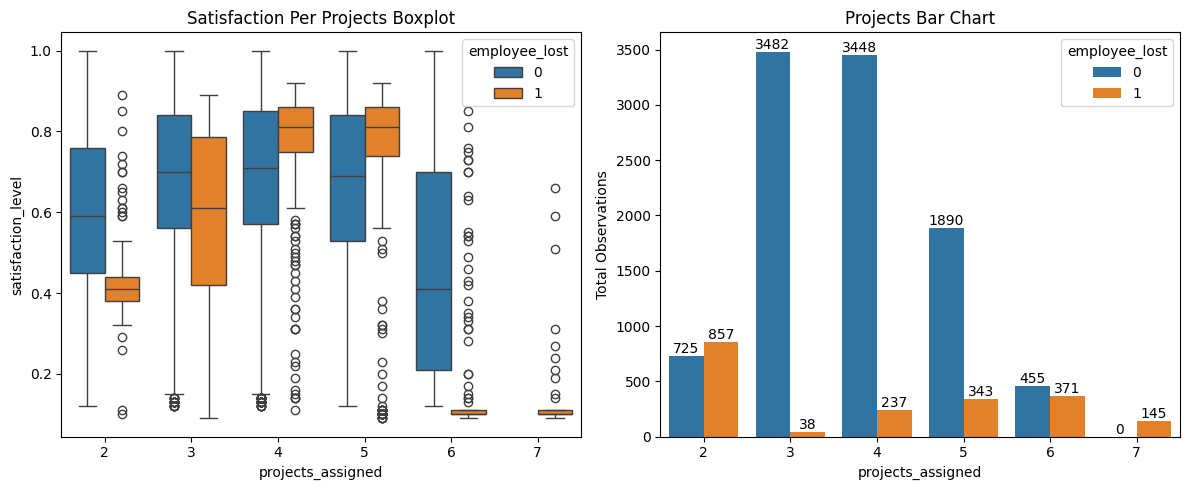

In [77]:
bar_boxplot_producer(df1, df_projects, 'satisfaction_level', 'projects_assigned',
                     'employee_lost', 'Satisfaction Per Projects Boxplot', 'Projects Bar Chart')

There are little to no outliers for the boxplots of employees who stayed. Furthermore, the satisfaction of those employees is higher in average when they have less than 6 projects assigned to them.

There are many outliers for the boxplots of employees who left. Furthermore, the satisfaction of those employees is higher in average when they have less than 6 projects assigned to them.

In [78]:
df_tenure = dataframe_outlier_producer('tenure_years', 'employee_lost', 'satisfaction_level')

df_tenure.sort_values(by = 'employee_lost')

,tenure_years,employee_lost,total_outliers,total observations
0,2,0,5,2879
2,3,0,17,4316
4,4,0,0,1510
6,5,0,0,580
8,6,0,0,433
10,7,0,0,94
12,8,0,0,81
14,10,0,0,107
1,2,1,0,31
3,3,1,32,874


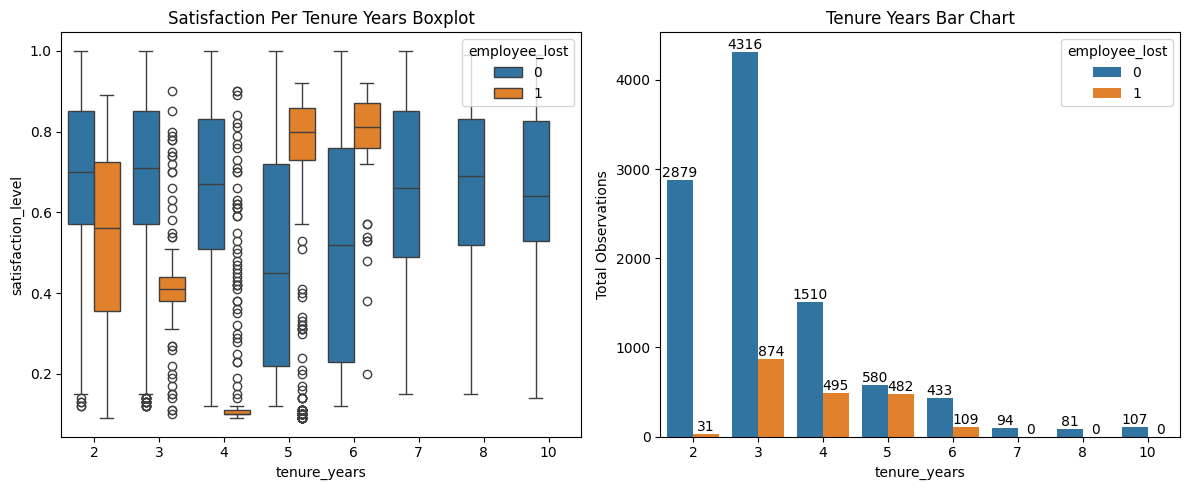

In [79]:
bar_boxplot_producer(df1, df_tenure, 'satisfaction_level', 'tenure_years',
                     'employee_lost', 'Satisfaction Per Tenure Years Boxplot', 'Tenure Years Bar Chart')

The boxplots of employees who stayed have little to no outliers, and most of the boxes except for the group of 5 and 6 years, have both the medians (the middle line in the box) and first quartiles (bottom of the box) whose value of satisfaction is higher 0.5.

The boxplots of employees who left have many outliers. Furthermore, the levels of satisfaction change for every year of tenure with the group of 5 and 6 being the ones which show highest medians and first quartiles.

In [80]:
df_accident = dataframe_outlier_producer('work_accident', 'employee_lost', 'satisfaction_level')

df_accident

,work_accident,employee_lost,total_outliers,total observations
0,0,0,0,8255
1,0,1,0,1886
2,1,0,0,1745
3,1,1,0,105


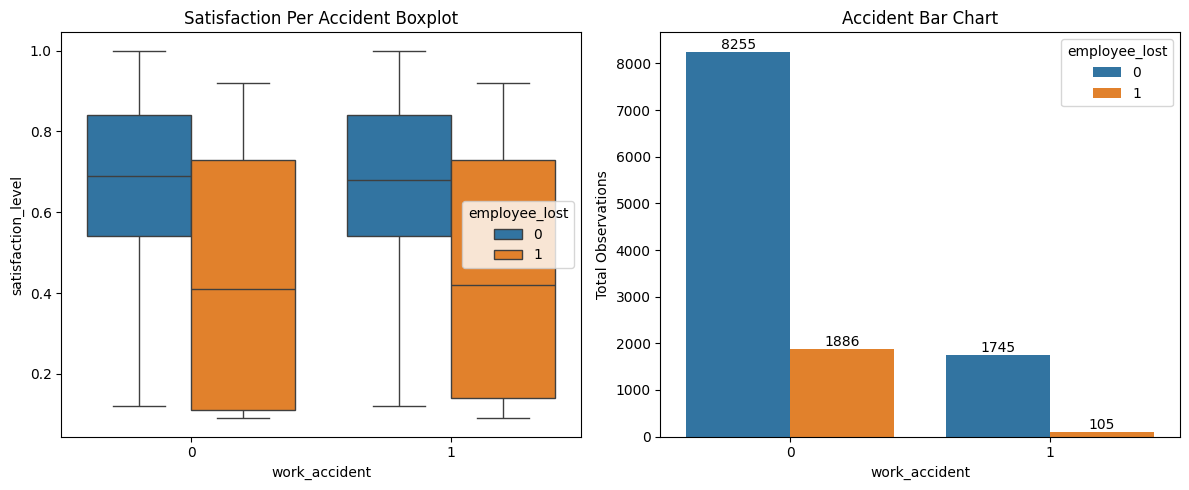

In [81]:
bar_boxplot_producer(df1, df_accident, 'satisfaction_level', 'work_accident',
                     'employee_lost', 'Satisfaction Per Accident Boxplot', 'Accident Bar Chart')

There are no outliers in the dataframe for work accidents. Having a work accident doesn't necessarily affect the satisfaction of employees. Furthermore, the satisfaction based is higher employees who stayed even if they had an accident at work.

Most of the jobs require their workers to work 37.5 to 40 hours per weeks and usually, a person works 22 business days per month. Now, the relationship between satisfaction level and work hours will be inspected. Those employees who worked more than 176 hours per month will be considered to have done overwork.

C:\Users\Owner\AppData\Local\Temp\ipykernel_33896\821299696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['overworked'] = df1['average_monthly_hours'] > 176
C:\Users\Owner\AppData\Local\Temp\ipykernel_33896\821299696.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df1.loc[df1['overworked'] == True, 'overworked'] = 1
C:\Users\Owner\AppData\Local\Temp\ipykernel_33896\821299696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

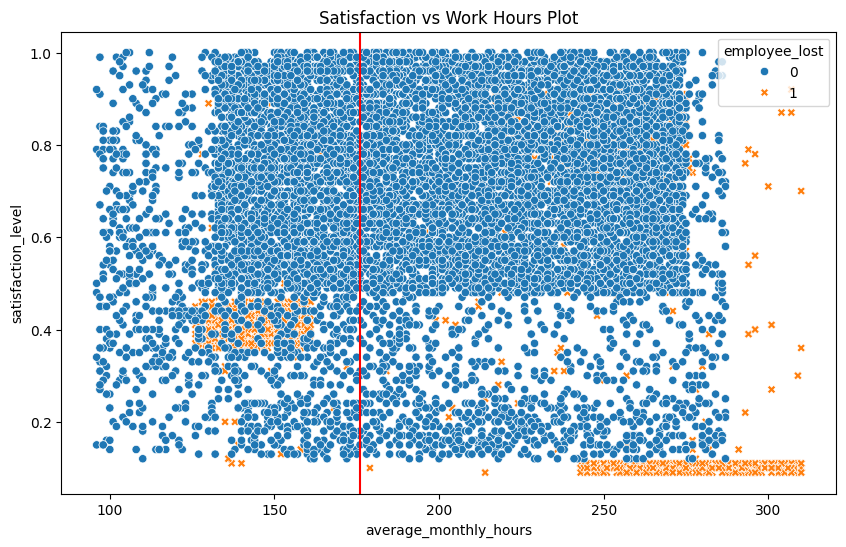

In [82]:
df1['overworked'] = df1['average_monthly_hours'] > 176

df1.loc[df1['overworked'] == True, 'overworked'] = 1

df1.loc[df1['overworked'] == False, 'overworked'] = 0

df1['overworked'] = df1['overworked'].astype(int)

plt.figure(figsize=(10,6))
sns.scatterplot(data = df1, y = 'satisfaction_level', x = 'average_monthly_hours', hue = 'employee_lost', style='employee_lost')
plt.axvline(176, color = 'r')
plt.title('Satisfaction vs Work Hours Plot')
plt.show()

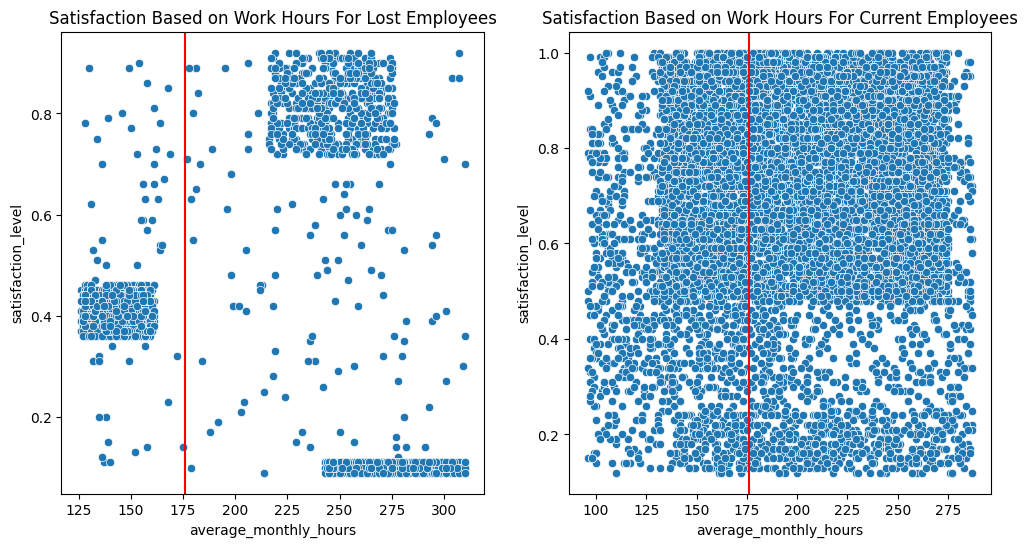

In [83]:
fig,axes = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(data = df1[df1['employee_lost'] == 1], y = 'satisfaction_level', x = 'average_monthly_hours', ax = axes[0])
sns.scatterplot(data = df1[df1['employee_lost'] == 0], y = 'satisfaction_level', x = 'average_monthly_hours', ax = axes[1])
axes[0].set(title = 'Satisfaction Based on Work Hours For Lost Employees')
axes[1].set(title = 'Satisfaction Based on Work Hours For Current Employees')
axes[0].axvline(176, color = 'r')
axes[1].axvline(176, color = 'r')
plt.show()

In [84]:
pd.concat([df1[df1['average_monthly_hours'] > 176]['employee_lost'].value_counts(), df1['employee_lost'].value_counts()], axis = 1)

,count,count
employee_lost,,
0,6460,10000
1,1101,1991


The 3 scatterplots created show the following:

a. For the employees who left, they are grouped mainly in 3 sections (with the remaining observations being scattered): first, those who have a satisfaction between 0.35 and 0.45 that worked less than 175. Then, the ones that have a satisfaction higher than 0.75 and worked more than 215 hours. Finally, those who worked more than 235 hours and have a satisfaction lower than 0.2.

b. For the employees who stayed, they are grouped mainly in 2 sections (with the remainings observations being scattered): those who have satisfaction lower than 0.3 and those who have it higher than 0.45.

c. More than 60% of the employees who stayed or left, have worked more than the expected amount of time.

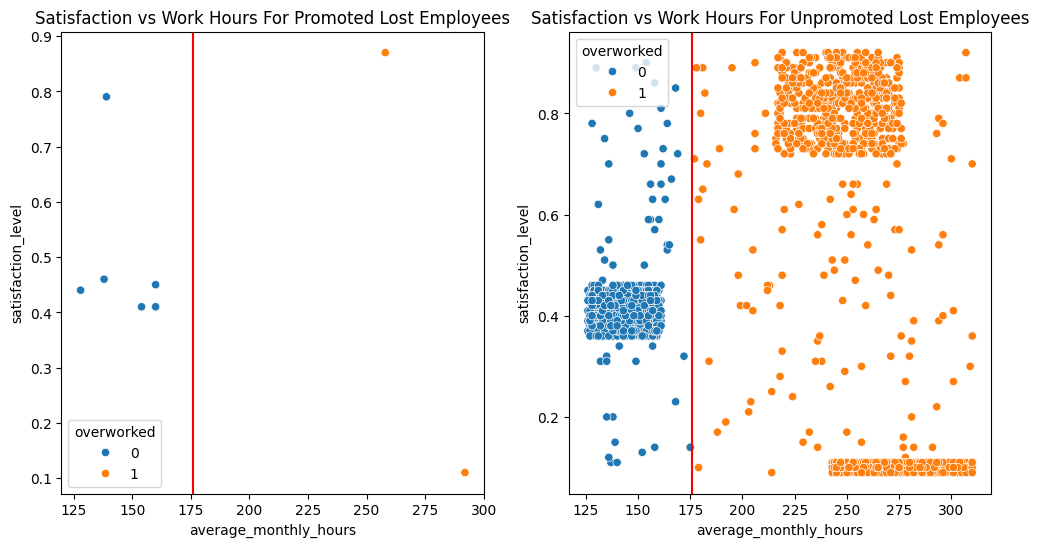

In [85]:
fig,axes = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(data = df1[(df1['employee_lost'] == 1) & (df1['promotion_last_5years'] == 1)], y = 'satisfaction_level',
                x = 'average_monthly_hours', hue = 'overworked', ax = axes[0])
sns.scatterplot(data = df1[(df1['employee_lost'] == 1) & (df1['promotion_last_5years'] == 0)], y = 'satisfaction_level',
                x = 'average_monthly_hours', hue = 'overworked', ax = axes[1])
axes[0].set(title = 'Satisfaction vs Work Hours For Promoted Lost Employees')
axes[1].set(title = 'Satisfaction vs Work Hours For Unpromoted Lost Employees')
axes[0].axvline(176, color = 'r')
axes[1].axvline(176, color = 'r')
plt.show()

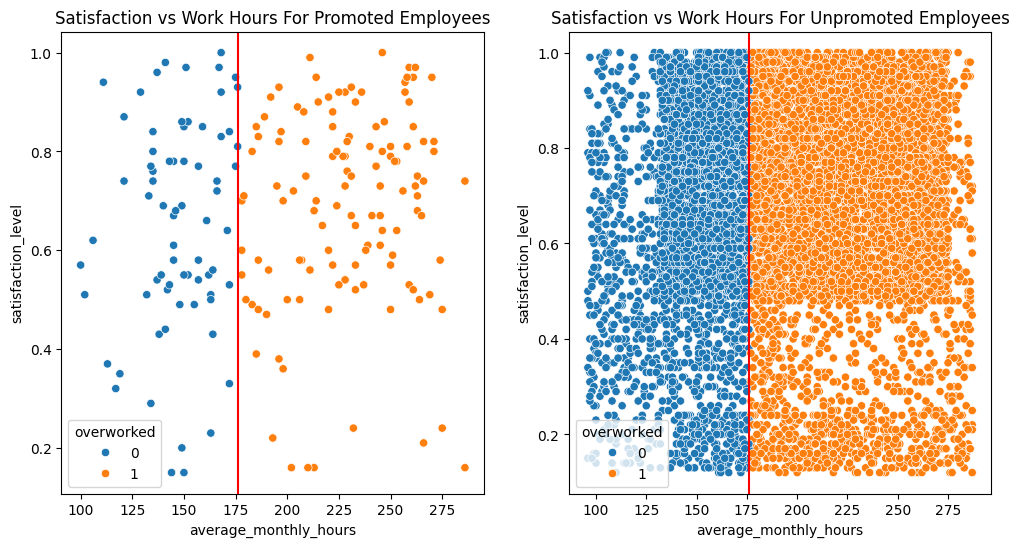

In [86]:
fig,axes = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(data = df1[(df1['employee_lost'] == 0) & (df1['promotion_last_5years'] == 1)], y = 'satisfaction_level',
                x = 'average_monthly_hours', hue = 'overworked', ax = axes[0])
sns.scatterplot(data = df1[(df1['employee_lost'] == 0) & (df1['promotion_last_5years'] == 0)], y = 'satisfaction_level',
                x = 'average_monthly_hours', hue = 'overworked', ax = axes[1])
axes[0].set(title = 'Satisfaction vs Work Hours For Promoted Employees')
axes[1].set(title = 'Satisfaction vs Work Hours For Unpromoted Employees')
axes[0].axvline(176, color = 'r')
axes[1].axvline(176, color = 'r')
plt.show()

Being promoted doesn't necessarily increase the satisfaction level of employees.

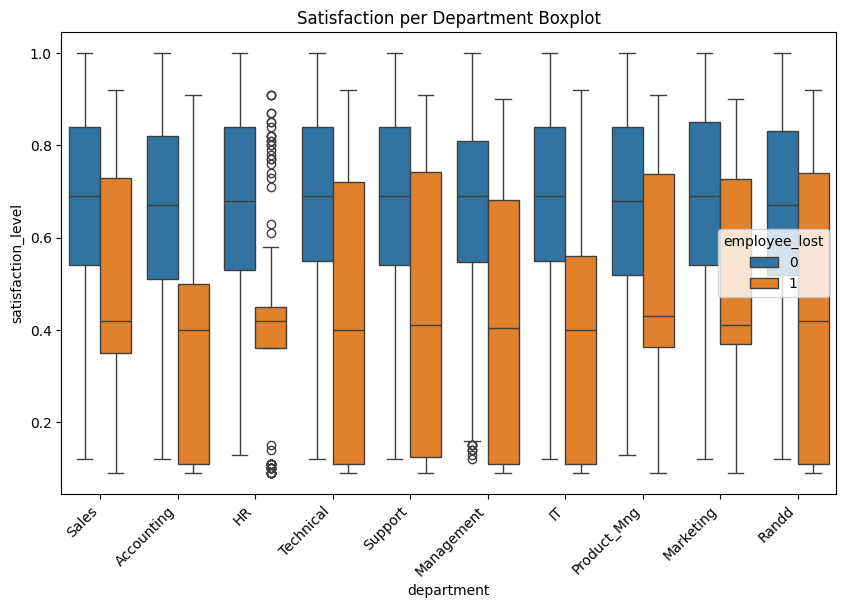

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df1, y = 'satisfaction_level', x = 'department', hue = 'employee_lost')
plt.title('Satisfaction per Department Boxplot')
plt.xticks(rotation = 45, horizontalalignment = 'right')
plt.show()

For employees who remain in the company, their satisfaction overall is good since each box has the first quartile higher than 0.5 and the median is close to 0.7 in every department.

For employees who left the company, their satisfaction overall is low since each box has the first quartile between 0.15 and 0.45 and the median lower than 0.5 in every department. Furthermore, the departments with lowest satisfaction for this group are Accounting, Technical, Support, Management, Randd and IT.

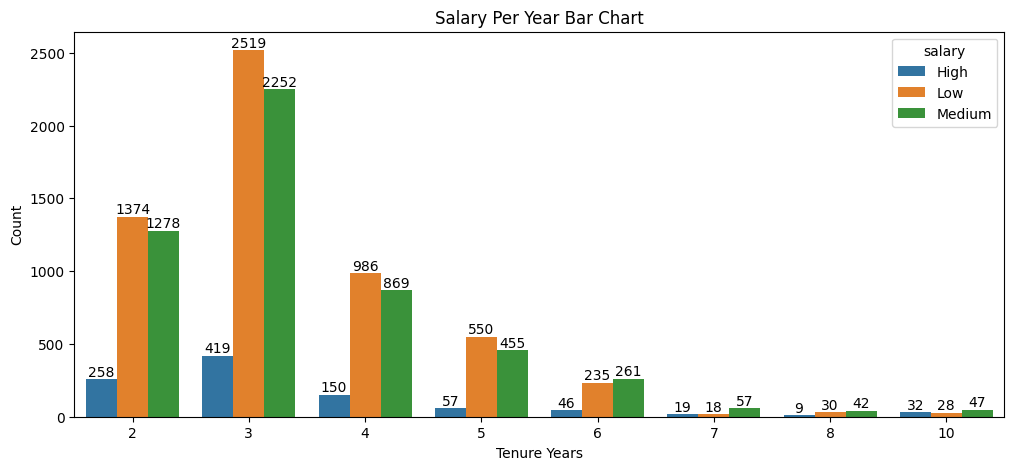

In [88]:
count_bar_chart(df1,'tenure_years','salary', 'Salary Per Year Bar Chart', 'Tenure Years')

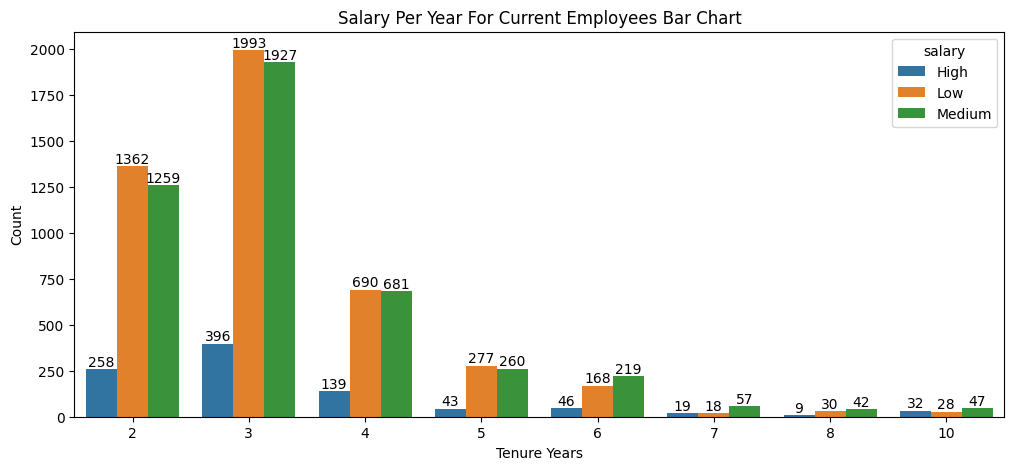

In [89]:
count_bar_chart(df1[df1['employee_lost'] == 0],'tenure_years','salary', 'Salary Per Year For Current Employees Bar Chart', 'Tenure Years')

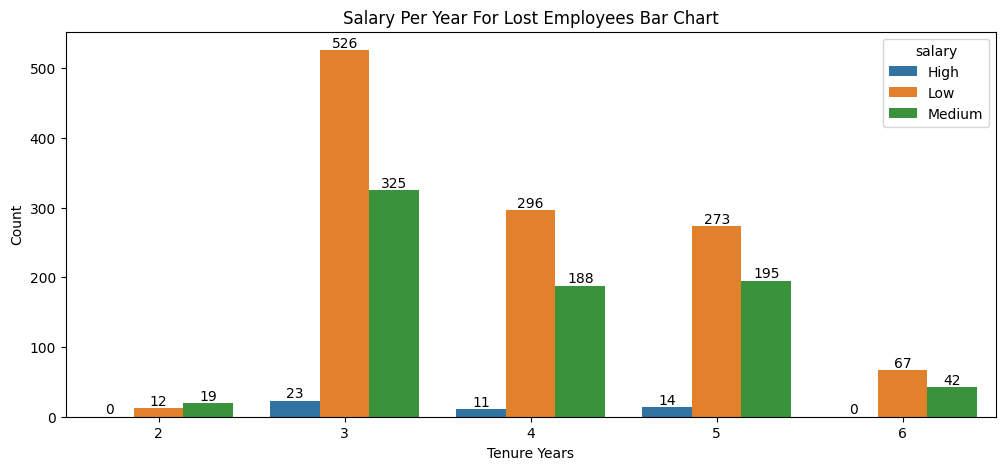

In [90]:
count_bar_chart(df1[df1['employee_lost'] == 1],'tenure_years','salary', 'Salary Per Year For Lost Employees Bar Chart', 'Tenure Years')

The 3 bar charts above provide the following insights:

1. Employees who have spent less than 5 years in the company tend to have low (mainly) or medium salaries. Furthermore, there is little people on this group who have a high salary. Finally, workers with more than 6 tenure years have mainly medium salary and the rest have either low or high salary.
2. The trend is the same for employees who stay in the company. Although the difference between the number of employees with medium and low salaries based on the years of tenure is lower compared to the entire dataset.
3. For the employees who left the company, most of them had low or medium salary each year. Furthermore, only those which had high salary after 3 or 5 years of tenure left.

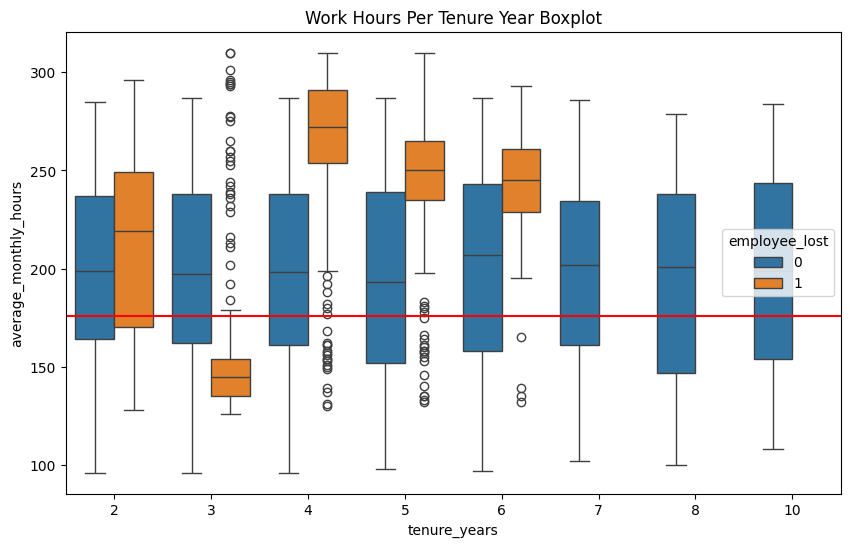

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df1, y = 'average_monthly_hours', x = 'tenure_years', hue = 'employee_lost')
plt.title('Work Hours Per Tenure Year Boxplot')
plt.axhline(176, color = 'r')
plt.show()

Most of the workers overworked (worked more than 176 hours per month) despite their tenure years which is shown by most of the medians being above the red line. For those who stayed, their amount of work is similar through the years while for the ones that left, many of them had more work except on their third year.

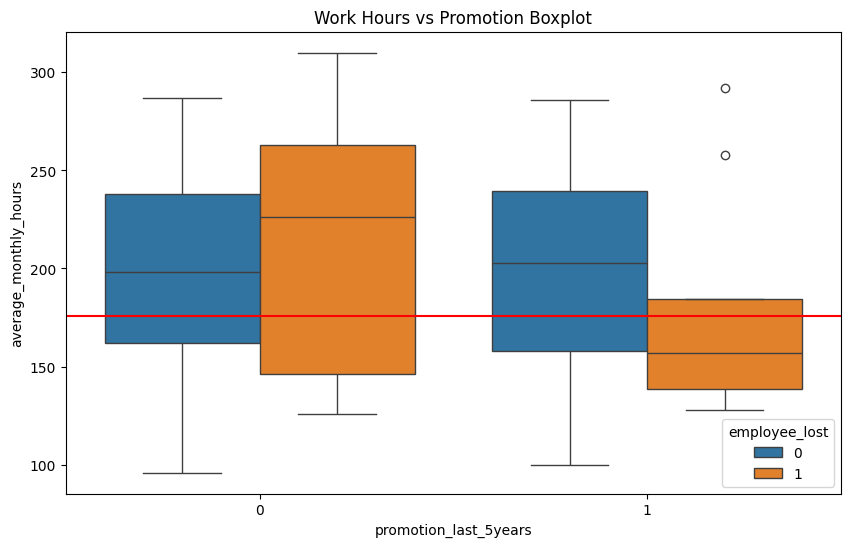

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df1, y = 'average_monthly_hours', x = 'promotion_last_5years', hue = 'employee_lost')
plt.title('Work Hours vs Promotion Boxplot')
plt.axhline(176, color = 'r')
plt.show()

Being promoted doesn't necessarily increase or reduce the number of work hours per month for employees who stay.

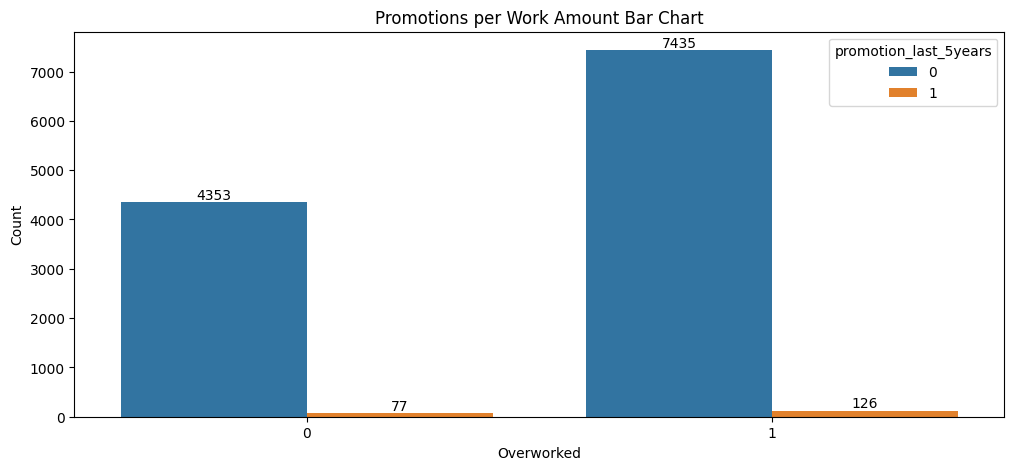

In [93]:
count_bar_chart(df1,'overworked','promotion_last_5years', 'Promotions per Work Amount Bar Chart', 'Overworked')

Very few employees who overworked got a promotion on the last 5 years.

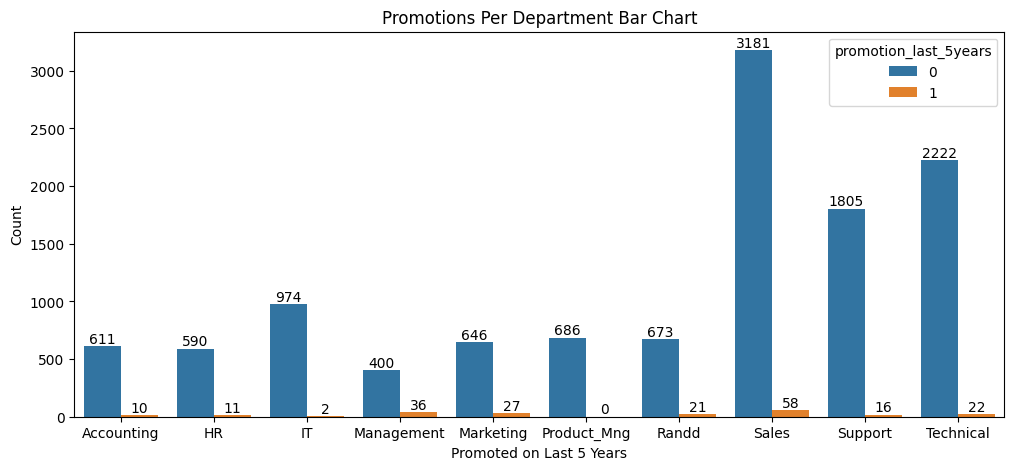

In [94]:
count_bar_chart(df1,'department','promotion_last_5years', 'Promotions Per Department Bar Chart', 'Promoted on Last 5 Years')

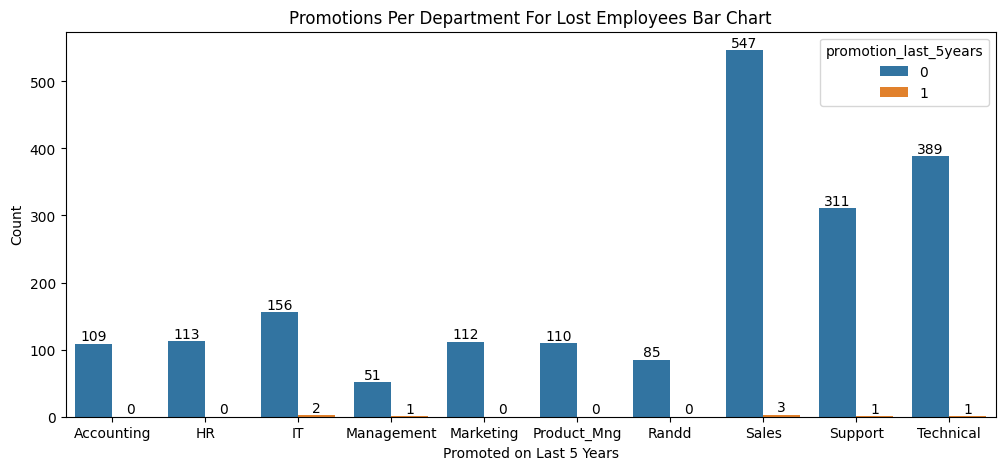

In [95]:
count_bar_chart(df1[df1['employee_lost'] == 1],'department','promotion_last_5years',
                'Promotions Per Department For Lost Employees Bar Chart', 'Promoted on Last 5 Years')

Almost all the employees who left hadn't been promoted in their departments over the last 5 years.

For each department, close to one sixth of the total number of workers in the data set, left their positions.

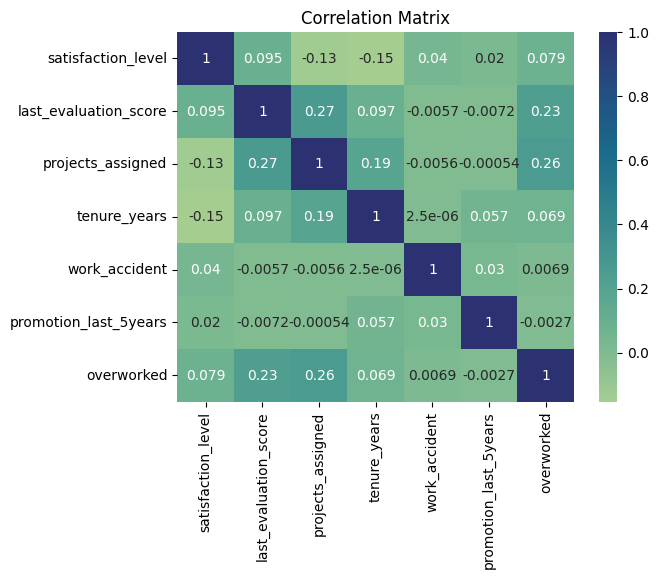

In [96]:
matrix = df1.drop(['department', 'salary','average_monthly_hours', 'employee_lost'], axis = 1).corr()

sns.heatmap(matrix, annot = True, cmap="crest")
plt.title('Correlation Matrix')
plt.show()

The matrix above shows the following insights:

1. Satisfaction level has little positive correlation with the last evaluation score, little negative correlation with the projects assigned and tenure years of employees, and little to no correlation with the remaining variables.

2. The evaluation score of the last performance review is positively correlated with the projects assigned and the overworked features and has little positive correlation with the tenure years.

3. The projects assigned to an employee have a positive correlation with the tenure years and the overworked variable.

4. The tenure years have little to no correlation with the work_accident, promotion over the last 5 years and the overworked variable.

5. Both the work accident and the promotion variables have little to no correlation with the other variables.

The multicollinearity assumption will be rechecked but this time, satisfaction_level won't be included in the check since it won't be used to generate the new models.

The reason for the change is to check how the models are affected when satisfaction is removed. Furthermore, the overworked variable was created from the average_monthly_hours variable and won't be used to develop the new models.

In [97]:
df_vif = df1.drop(['satisfaction_level','department', 'salary', 'average_monthly_hours', 'employee_lost'], axis = 1)

vif_data = pd.DataFrame() 
vif_data["feature"] = df_vif.columns 

vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) 
                          for i in range(len(df_vif.columns))]
vif_data

,feature,VIF
0,last_evaluation_score,12.356527
1,projects_assigned,11.836158
2,tenure_years,6.829331
3,work_accident,1.174559
4,promotion_last_5years,1.021608
5,overworked,2.990838


Compared to the time that the VIF values were computed in the first run of the Analysis stage, the values for the second run are lower when  removing the satisfaction_level feature and using the overworked variable instead of the one which has the average monthly hours. However, the first 3 values are all still higher than 5 which implies that there is correlation between those variables and the no collinearity assumption is still violated.

# paCe: Construct Stage, run 2
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


For this stage, the overworked variable will be used instead of the work hours variable since this is information that won't be revealed to the public. Furthermore, the satisfaction level variable will also be excluded of the models constructed in this stage to see how much the importance of the variables changes compared to the previous models when the satisfaction is not taken into account.

In [98]:
df_dummy_2 = pd.get_dummies(df1)

df_dummy_2

,satisfaction_level,last_evaluation_score,projects_assigned,average_monthly_hours,tenure_years,work_accident,employee_lost,promotion_last_5years,overworked,department_Accounting,...,department_Management,department_Marketing,department_Product_Mng,department_Randd,department_Sales,department_Support,department_Technical,salary_High,salary_Low,salary_Medium
0,0.38,0.53,2,157,3,0,1,0,0,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,1,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,1,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,1,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,0,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,1,False,...,True,False,False,False,False,False,False,True,False,False
11996,0.74,0.95,5,266,10,0,0,1,1,False,...,True,False,False,False,False,False,False,True,False,False
11997,0.85,0.54,3,185,10,0,0,1,1,False,...,True,False,False,False,False,False,False,True,False,False
11998,0.33,0.65,3,172,10,0,0,1,0,False,...,False,True,False,False,False,False,False,True,False,False


In [99]:
X2 = df_dummy_2.drop(['satisfaction_level', 'average_monthly_hours', 'employee_lost'], axis = 1)

y2 = df_dummy_2['employee_lost']

In [100]:
X2_train, X2_test, y2_train, y2_test = md.train_test_split(X2,y2, test_size = 0.2, random_state = 0, stratify=y)

y2_train.value_counts(normalize = True)

employee_lost
0    0.833924
1    0.166076
Name: proportion, dtype: float64

In [101]:
X2_tr, X2_val, y2_tr, y2_val = md.train_test_split(X2_train, y2_train, test_size = 0.25, random_state = 0)

In [102]:
simple_tree_new = tree.DecisionTreeClassifier(random_state = 0)

simple_tree_new_CV = md.GridSearchCV(simple_tree_new, cv_params_tree, scoring = scoring, cv = 5, refit = 'f1')

In [103]:
%%time

simple_tree_new_CV.fit(X2_tr, y2_tr)

CPU times: total: 6.73 s
Wall time: 13.2 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [4, 6, 8, 10]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [104]:
print(f'The best parameters to build the tree are {simple_tree_new_CV.best_params_}')

print(f'The best score for the f1 metric with the best parameters is {simple_tree_new_CV.best_score_}')

The best parameters to build the tree are {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 4}
The best score for the f1 metric with the best parameters is 0.8902150725461853


In [105]:
print(f'The best parameters to build the tree are {simple_tree_CV.best_params_}')

print(f'The best score for the f1 metric with the best parameters is {simple_tree_CV.best_score_}')

The best parameters to build the tree are {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
The best score for the f1 metric with the best parameters is 0.94099157259197


In [106]:
random_forest_new = ensemble.RandomForestClassifier(random_state = 0)

random_forest_new_CV = md.GridSearchCV(random_forest_new, cv_params_rf, scoring = scoring, cv = 5, refit = 'f1')

In [107]:
%%time

random_forest_new_CV.fit(X2_tr, y2_tr)

CPU times: total: 3min 4s
Wall time: 5min 38s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [0.5, 0.75],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [50, 75]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [108]:
print(f'The best parameters to build the tree are {random_forest_new_CV.best_params_}')

print(f'The best score for the f1 metric with the best parameters is {random_forest_new_CV.best_score_}')

The best parameters to build the tree are {'max_depth': 10, 'max_features': 0.75, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 75}
The best score for the f1 metric with the best parameters is 0.9013895922917202


In [109]:
print(f'The best parameters to build the tree are {random_forest_CV.best_params_}')

print(f'The best score for the f1 metric with the best parameters is {random_forest_CV.best_score_}')

The best parameters to build the tree are {'max_depth': 10, 'max_features': 0.75, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 75}
The best score for the f1 metric with the best parameters is 0.9493229987742783


In [110]:
xgb_model_new = xgb.XGBClassifier(random_state = 0)

xgb_model_new_CV = md.GridSearchCV(xgb_model_new, cv_params_xgb, scoring = scoring, cv = 5, refit = 'f1')

In [111]:
%%time

xgb_model_new_CV.fit(X2_tr, y2_tr)

CPU times: total: 7min 7s
Wall time: 3min 40s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.5, 0.75, 0.9],
                         'learning_rate': [0.05, 0.1], 'max_depth': [5, 10, 15],
                         'min_child_weight': [2, 3, 4],
                         'n_estimators': [50, 75]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [112]:
print(f'The best parameters to build the tree are {xgb_model_new_CV.best_params_}')

print(f'The best score for the f1 metric with the best parameters is {xgb_model_new_CV.best_score_}')

The best parameters to build the tree are {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 75}
The best score for the f1 metric with the best parameters is 0.9013685709072174


In [113]:
print(f'The best parameters to build the tree are {xgb_model_CV.best_params_}')

print(f'The best score for the f1 metric with the best parameters is {xgb_model_CV.best_score_}')

The best parameters to build the tree are {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 50}
The best score for the f1 metric with the best parameters is 0.9475631922359762


In [114]:
training_metrics_new_df = pd.concat([best_metrics_frame('Decision Tree', simple_tree_CV),
                                     best_metrics_frame('Decision Tree New', simple_tree_new_CV),
                                     best_metrics_frame('Random Forest', random_forest_CV),
                                     best_metrics_frame('Random Forest New', random_forest_new_CV),
                                     best_metrics_frame('XGB', xgb_model_CV),
                                     best_metrics_frame('XGB New', xgb_model_new_CV)]).reset_index(drop = True)

training_metrics_new_df

,Model Name,F1 Score,Accuracy,Recall,Precision,AUC
0,Decision Tree,0.940992,0.981235,0.914342,0.969554,0.948928
1,Decision Tree New,0.890215,0.964416,0.880418,0.900435,0.947617
2,Random Forest,0.949323,0.984015,0.916033,0.985321,0.973016
3,Random Forest New,0.901390,0.967752,0.899077,0.903870,0.961548
4,XGB,0.947563,0.983459,0.913487,0.984463,0.982038
5,XGB New,0.901369,0.968169,0.888063,0.915131,0.966716


For almost every metrics, the new models which do not include the satisfaction level and uses the overworked variable instead of the work hours, perform with less efficiency than the originals.

In [115]:
y_pval_tree_new = simple_tree_new_CV.predict(X2_val)

y_pval_rf_new = random_forest_new_CV.predict(X2_val)

y_pval_xgb_new = xgb_model_new_CV.predict(X2_val)

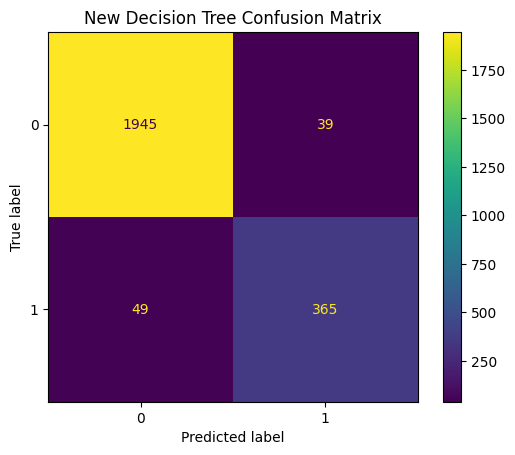

In [116]:
confusion_matrix_displayer(y2_val, y_pval_tree_new, 'New Decision Tree Confusion Matrix', simple_tree_new_CV)

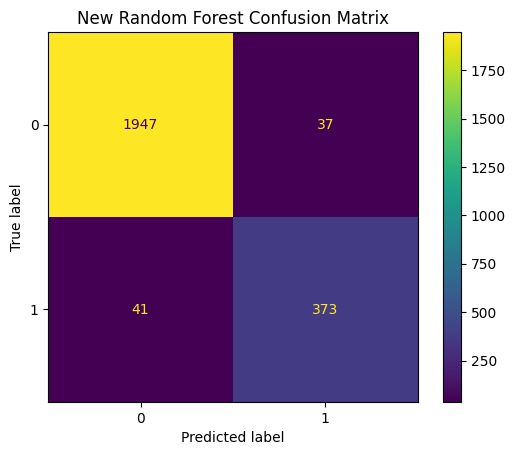

In [117]:
confusion_matrix_displayer(y2_val, y_pval_rf_new, 'New Random Forest Confusion Matrix', random_forest_new_CV)

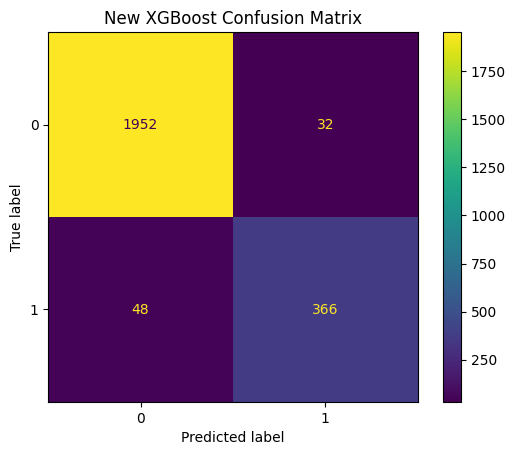

In [118]:
confusion_matrix_displayer(y2_val, y_pval_xgb_new, 'New XGBoost Confusion Matrix', xgb_model_new_CV)

In [119]:
print(f'F1 score of the Decision Tree Model: {round(metrics.f1_score(y2_val, y_pval_tree_new),5)}')
print(f'F1 score of the Random Forest Model: {round(metrics.f1_score(y2_val, y_pval_rf_new),5)}')
print(f'F1 score of the XGB Model: {round(metrics.f1_score(y2_val, y_pval_xgb_new),5)}')

F1 score of the Decision Tree Model: 0.89242
F1 score of the Random Forest Model: 0.90534
F1 score of the XGB Model: 0.90148


In [120]:
print(f'Precision score of the Decision Tree Model: {round(metrics.precision_score(y2_val, y_pval_tree_new),5)}')
print(f'Precision score of the Random Forest Model: {round(metrics.precision_score(y2_val, y_pval_rf_new),5)}')
print(f'Precision score of the XGB Model: {round(metrics.precision_score(y2_val, y_pval_xgb_new),5)}')

Precision score of the Decision Tree Model: 0.90347
Precision score of the Random Forest Model: 0.90976
Precision score of the XGB Model: 0.9196


In [121]:
print(f'Recall score of the Decision Tree Model: {round(metrics.recall_score(y2_val, y_pval_tree_new),5)}')
print(f'Recall score of the Random Forest Model: {round(metrics.recall_score(y2_val, y_pval_rf_new),5)}')
print(f'Recall score of the XGB Model: {round(metrics.recall_score(y2_val, y_pval_xgb_new),5)}')

Recall score of the Decision Tree Model: 0.88164
Recall score of the Random Forest Model: 0.90097
Recall score of the XGB Model: 0.88406


All the metrics scores for the matrices of the new models are lower than the ones of the original models. Furthermore, the number of false negatives increased from 35 to more than 40 in each model, the number of false positives increased for each model and now each model returned between 30 to 40 of those errors. Part of the goal of this project is also saving money by avoiding the search for new employees and those errors don't contribute to that goal. Therefore, after the F1 score, precision is the most important metric for this model.

For the new models, the one with the highest F1 score is the Random Forest which has a score of 0.90534 with 37 false positives and 41 false negatives. The second greatest one is xgboost model with an f1 score of 0.90148 (extremely close to the one of the Random Forest) with 32 false positives and 48 false negatives. Therefore, the model used to train the final data should be the xgboost model.

In [122]:
xgb_model_new_final = xgb.XGBClassifier(random_state = 0)

xgb_model_new_final_CV = md.GridSearchCV(xgb_model_new_final, cv_params_xgb, scoring = scoring, cv = 5, refit = 'f1')

In [123]:
%%time

xgb_model_new_final_CV.fit(X2_train, y2_train)

CPU times: total: 8min 12s
Wall time: 3min 59s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.5, 0.75, 0.9],
                         'learning_rate': [0.05, 0.1], 'max_depth': [5, 10, 15],
                         'min_child_weight': [2, 3, 4],
                         'n_estimators': [50, 75]},
             refit='f1',
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [124]:
print(f'The best parameters to build the tree are {xgb_model_new_final_CV.best_params_}')

print(f'The best score for the f1 metric with the best parameters is {xgb_model_new_final_CV.best_score_}')

The best parameters to build the tree are {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 2, 'n_estimators': 75}
The best score for the f1 metric with the best parameters is 0.9035552636905388


In [125]:
y_pred_xgb = xgb_model_new_final_CV.predict(X2_test)

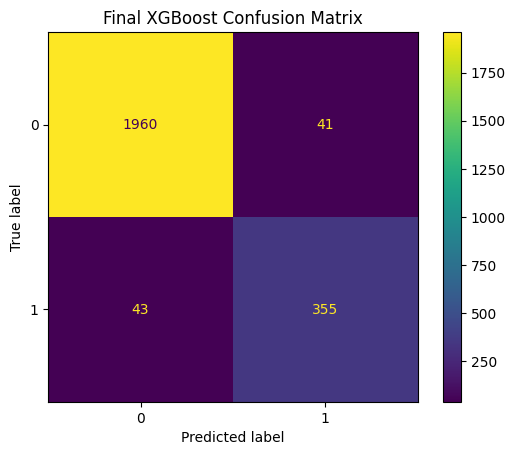

In [126]:
confusion_matrix_displayer(y2_test, y_pred_xgb, 'Final XGBoost Confusion Matrix', xgb_model_new_final_CV)

In [127]:
print(f'F1 score of the XGBoost Model with the test data is: {round(metrics.f1_score(y2_test, y_pred_xgb),5)}')
print(f'Recall score of the XGBoost Model with the test data is: {round(metrics.recall_score(y2_test, y_pred_xgb),5)}')
print(f'Precision score of the XGBoost Model with the test data is: {round(metrics.precision_score(y2_test, y_pred_xgb),5)}')

F1 score of the XGBoost Model with the test data is: 0.89421
Recall score of the XGBoost Model with the test data is: 0.89196
Precision score of the XGBoost Model with the test data is: 0.89646


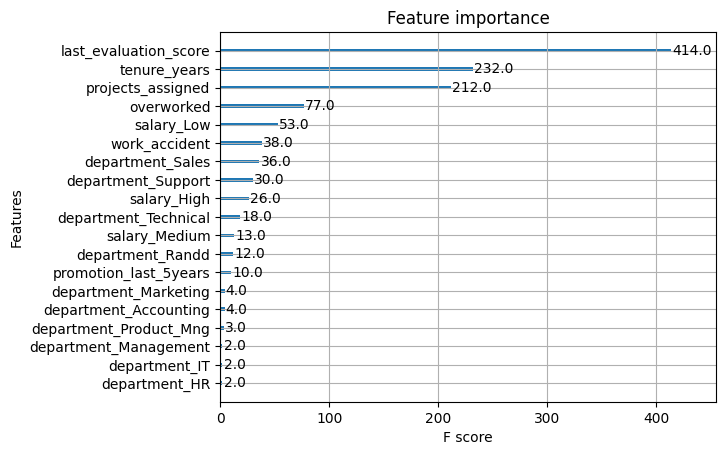

In [128]:
xgb.plot_importance(xgb_model_new_final_CV.best_estimator_);

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. The Random Forest model is the model that provides a lower number of errors when doing the predictions regarding the employee exits when the satisfaction level is included. The most important features for the Random Forest model after fitting the training and validation datasets are evaluation score, satisfaction level, projects assigned, tenure years, average monthly work hours and whether the salary is low. 
The model is extremely good, better at handling false negatives than false positivs.e

2. The business recommendations are written in a section below.

3. My potential recommendations are to focus employee retention efforts on the departments with the highest amount of employee exits (sales, technical and support) by increasing the satisfaction levels of the members of those 3 departments. Regulate the number of simultaneous projects assigned to a person to avoid work overload. Perform weekly or biweekly pools during meetings to check the employees current work state and load.

4. The model could be improved if additional features could be added to the dataset like number of vacations given, whether the employee received a bonus, if the department has development resources for the employees, etc. The reason for this is that the dataset only considers 9 features while there might be others which also influence employee retention levels.

5. Some questiosn that I could address for the team are: Why was the F1 score chosen as the main evaluation metric? What were the scores for the evaluation metrics for the other models during the training and validation stages? What does each parameter used to refine the model do? How were the values of the hyperparameters chosen to refine the model?

6. In this stage, I found myself using the Matplotlib library to save the visuals created during the Construct stage so they could be added to the executive summary that will be presented to the leadership team. Furthermore, I will be using Google Slides to write the summary.

7. My ethical considerations in this stage are similar to the ones in the Construction stage. Furthermore, I need to consider if the predictions of the model are fair and make sense, and ask if therewill bes somebody responsible for reviewing/monitoring the model before and after its deployment


## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

During the model selection using the validation sets, the Random Forest model provided a lower number of errors when doing the predictions regarding the employee exits.

The scores of the evaluation metrics for this model with the validation set are:

* F1 score: 0.95466* Recall score: 0.91546
* Precision score: 0.99731

The most important features for the Random Forest model after fitting the training and validation datasets as shown by the importance feature bar chart are evaluation score, satisfaction level, projects assigned, tenure years, average monthly work hours and if the salary is low or not.

The scores of the evaluation metrics for the Random Forest model with the test data set after being trained with both the validation and training datasets are:

* F1 score: 0.9477
* Recall score: 0.9120
* Precision score: 0.9864

If satisfaction is not included in the model and work hours are replaced by the overworked binary feature, the best model to use would be the XGBoost which got the following scores with the test data:

* F1 score: 0.89421
* Recall score: 0.89196
* Precision score: 0.89646

The most important features for the XGBoost model after fitting the training and validation datasets as shown by the importance feature bar chart are are evaluation score of the last performance review, tenure years, projects assigned, whether the worker did overwork or not and their salary is low or not.

### Conclusion, Recommendations, Next Steps

**Conclusion**

1. The Random Forest machine learning model which includes the satisfaction level of the employees is a highly efficient method to predict whether an
employee will leave or remain in the company based on the answer he/she provides to the survey given by the HR department. While some errors are produced, the predictions are almost completely accurate.

2. In the case that satisfaction and work hours of employees can't be recorded at all for the future, use the XGBoost model instead since it gives very good results when predicting if an employee will stay or leave.

3. The most important features that determine if an employee will leave or remain in the company are: satisfaction level, projects assigned, tenure years, evaluation score of the last performance review, average monthly work hours and if the salary of the employee is low or not.

4. Some factors that influence the satisfaction of people at the company are the number of projects to which they contribute, their salary and the department in which they work. 

**Recommendations**

1. Reward employees who overwork to increase their satisfaction like promoting them or give them additional payment for the extra amount of hours they do. However, give a limit to the number of hours that can be done per week or month since many employees who left worked close to 300 hours per week which is close to 13.5 hours per business day.

2. Give promotions to employees sooner than 5 years, starting after their 3 first years of work based on their overall performance.

3. Improve the satisfaction of departments with higher employee losses and with lower employee satisfaction.

4. Gather further information from the employees to improve the model’s performance.

5. Deploy the model since the number of errors produced by it is small.

6. Limit the number of projects to which a worker can simultaneously contribute to avoid work overloads.

7. Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.


**Next Steps**

1. Assign a supervisor to monitor the model performance after deploying it.
   
2. Perform research for the attributes that contribute more to employee satisfaction to increase employee retention.
   
3. Add the suggested features and more observations to the dataset if possible to improve the model's performance.
   
4. Revisit the model's performance after a year to confirm if it achieve the desired result.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.